# Analysez des données de systèmes éducatifs

## Import

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy
from skimpy import skim
import plotly.express as px
import json
import requests
import pycountry
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Création des DataFrame

In [3]:
country_series = pd.read_csv("data/EdStatsCountry-Series.csv", sep=",", low_memory=False)
country = pd.read_csv("data/EdStatsCountry.csv", sep=",", low_memory=False)
ed_data = pd.read_csv("data/EdStatsData.csv", sep=",", low_memory=False)
foot_note = pd.read_csv("data/EdStatsFootNote.csv", sep=",", low_memory=False)
ed_series = pd.read_csv("data/EdStatsSeries.csv", sep=",", low_memory=False)

Pour ne pas modifier les DF de base, on crée des copies indépendantes. A chaque fois que le kernel sera relancé, on repartira donc avec les bonnes données de base.

In [4]:
country_series = country_series.copy()
country = country.copy()
ed_data = ed_data.copy()
foot_note = foot_note.copy()
ed_series = ed_series.copy()


### Afficher les 5 premières lignes des DF

In [5]:
country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [6]:
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [7]:
ed_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
foot_note.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [9]:
ed_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyse de country_series

### Description de chaque colonne

In [10]:
country_series_info = country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


**CountryCode** : le code indicatif de chaque pays  
  
**SeriesCodes** : le code Série de chaque pays  
  
**DESCRIPTION** : source des données  
  
**Unnamed** : aucune info, rempli de NaN  

*Pour faciliter la lecture du DF, on renomme DESCRIPTION en Description*

In [11]:
country_series.rename(columns={'DESCRIPTION': 'Description'}, inplace=True)

### Nombre de lignes & colonnes 

In [12]:
country_series.shape

(613, 4)

Le DF country_series à 613 lignes & 4 colonnes

### Calcul du nombre de doublons

In [13]:
country_series.duplicated().sum()

0

Le DF ne semble pas contenir de doublons, mais comme vu avec **head(5)**, nous avons pu voir des doublons dans **CountryCode** , regardons cela plus en détails :

In [14]:
country_series.loc[country_series['CountryCode'].duplicated(keep=False),:]

,CountryCode,SeriesCode,Description,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


On remarque que certains pays ont **deux SeriesCode**. La question qui se pose alors est : Qu'est ce qu'un **SeriesCode** ?

La colonne SeriesCode (ex. : SP.POP.TOTL) représente l’**indicateur statistique** que la ligne décrit.

C’est un code unique utilisé pour identifier une série temporelle : population, PIB, CO₂, scolarisation, etc.

Listons maintenant tous les SeriesCode existant dans le DF.

In [15]:
country_series['SeriesCode'].value_counts()

SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.0014.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64

### Valeurs manquantes

In [16]:
skim(country_series)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 613    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA     ┃ NA %    ┃ mean    ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Unnamed: 3        │    613 │     100 │     nan │   nan │   nan │   nan │   nan │   nan │    nan │          │  │
│ └───────────────────┴────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CountryCode               │       0 │          0 │                            1 │                      613 │  │
│ │ SeriesCode                │       0 │          0 │                            1 │                      613 │  │
│ │ Description               │       0 │          0 │                          7.5 │                     4587 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Cette erreur indique qu’un **NaN** s’est glissé dans une division lors du calcul d’un histogramme. Celà est arrivé car la colonne **Unnamed: 3** est composée entièrement de **NaN**

#### Remplissage des colonnes

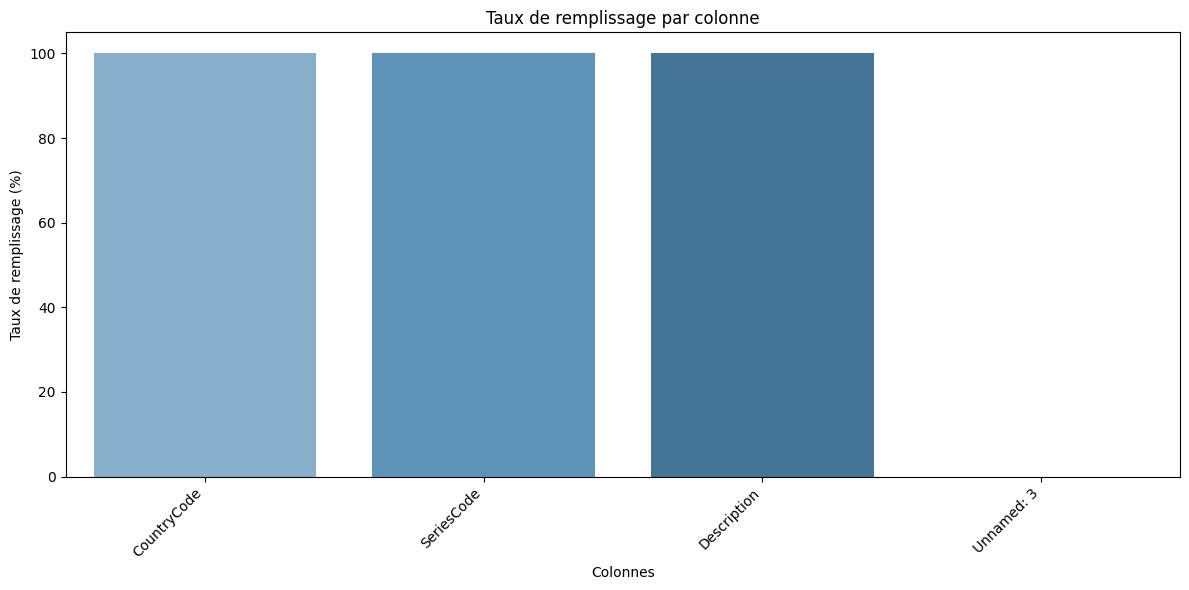

In [17]:
# 1. Calcul du taux de remplissage
taux = (country_series.notna().mean() * 100).round(2)
#### Crée un DF Booléan, avec not NaN = True, et NaN = False, avec True = 1 & False = 0. mean() calcule la proportion de valeurs
#### non manquantes, colonne par colonne. On le passage en %, arrondi à 2 décimales :: On obtient une Serie

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']
#### On transforme la Série en DF, avec deux colonnes: Colonne et TauxRemplissage

# 3. Affichage avec seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### On crée un histogramme à barres (barplot), avec en x le nom des colonnes & en y le taux de remplissage, 
#### Avec la palette de couleurs Blues_d que l'on applique sur les colonnes

On remarque que les colonnes *CountryCode*, *SeriesCode*, et *Description* sont totalement remplies.  
La colonne *Unnamed :3* est totalement vide, on peut donc la supprimer.

In [18]:
country_series_filtered = country_series.drop("Unnamed: 3", axis=1)

In [19]:
country_series_filtered.columns

Index(['CountryCode', 'SeriesCode', 'Description'], dtype='object')

La colonne * Unnamed :3*  a bien été supprimée.

In [20]:
country_series_filtered.describe().T

,count,unique,top,freq
CountryCode,613,211,GEO,18
SeriesCode,613,21,SP.POP.TOTL,211
Description,613,97,Data sources : United Nations World Population...,154


In [21]:
country_series_filtered.value_counts("CountryCode")

CountryCode
GEO    18
MDA    18
TZA    12
MAR    12
MUS    12
       ..
IRQ     2
ISL     2
ISR     2
ITA     2
HRV     2
Name: count, Length: 211, dtype: int64

In [22]:
country_series_filtered.value_counts("SeriesCode")

SeriesCode
SP.POP.GROW          211
SP.POP.TOTL          211
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.CD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.KD         5
NY.GDP.PCAP.CD         5
SP.POP.0014.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.1564.MA.IN      4
Name: count, dtype: int64

In [23]:
country_series_filtered.value_counts("Description")

Description
Data sources : United Nations World Population Prospects                                                                          154
Data sources: United Nations World Population Prospects                                                                           137
Estimates are based on regression.                                                                                                 84
Data sources : Eurostat                                                                                                            54
Derived using ratio of age group from WPP and World Bank population.                                                               24
                                                                                                                                 ... 
Data sources : Statistics Greenland                                                                                                 1
Data sources : Statistics Canada                  

## Analyse de country

### Description de chaque colonne

In [24]:
country_info = country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

**Country Code** : code ISO3 à trois lettres (ex. AFG pour Afghanistan) utilisé pour identifier chaque pays de façon standardisée.  
  
**Short Name** : nom court du pays (ex. “World”, “Low & middle income”).  
  
**Table Name** : version plus longue ou formelle du nom (ex. “Dem. Rep. Congo”). 
  
**Long Name** : nom complet du pays (souvent avec précisions officielles, ex. “Republic of Congo”).  
  
**2‑alpha code** : code ISO‑3166 à deux lettres (ex. AF pour Afghanistan). 
  
**Currency Unit** : devise monétaire (ex. “US dollars”).  
  
**Special Notes** : notes spécifiques ou exceptions (ex. agrégats regionaux, méthodes).  
  
**Region** : zone géographique selon le World Bank (ex. Europe & Central Asia). 
  
**Income Group** : classification par revenu (Low, Lower‐middle, Upper‐middle, High income). 
  
**WB‑2 code** : code interne abrégé utilisé par la Banque mondiale pour régions/groupes (ex. UMC pour upper-middle income). 
  
**National accounts base year** : année de base utilisée pour les comptes nationaux.  
  
**National accounts reference year** : année de référence statistique.  
  
**SNA price valuation** : méthode d’évaluation des prix selon Système des comptes nationaux (ex. bas prix, prix marché). 
  
**Lending category** : type de financement auquel le pays a accès (IDA = prêt concessionnel, IBRD etc.). 

**Other groups** : appartenance à d’autres groupes (ex. EMU, HIPC).  
  
**System of National Accounts** : version du SNA appliquée (1993, 2008…).  
  
**Alternative conversion factor** : facteur de conversion alternatif pour certaines données.  
  
**PPP survey year** : année des données d’évaluation par Parité de Pouvoir d’Achat. 
  
**Balance of Payments Manual in use** : version du manuel BOP utilisée (BPM6…). 
  
**External debt Reporting status** : statut du pays concernant le reporting de sa dette externe (ex. “Actual”). 

**System of trade** : type de collecte des données commerciales (ex. “General trade system”).
  
**Government Accounting concept** : méthode de comptabilité gouvernementale (ex. centralisé). 
  
**IMF data dissemination standard** : norme suivie selon FMI (e‑GDDS, SDDS…). 
  
**Vital registration complete** : si le pays a un système complet d’enregistrement des naissances/décès.  

**Latest population census** : année du dernier recensement. 
  
**Latest household survey** : dernière enquête ménages (ex. DHS, MICS).  
  
**Source of most recent Income and expenditure data** : référence de la donnée la plus récente (ex. Living Standards Measurement Study). 
  
**Latest agricultural census / industrial data / trade data / water withdrawal data** : année de la dernière information disponible sur ces thèmes.  

In [25]:
country = country.drop("Unnamed: 31", axis=1)

### Nombre de lignes & colonnes 

In [26]:
country.shape

(241, 31)

Le DF country à *241 lignes* &  *32 colonnes*

### Calcul du nombre de doublons

In [27]:
country.duplicated().sum()

0

In [28]:
country.loc[country['Country Code'].duplicated(keep=False),:]
### On regarde si chaque ligne de 'Country Code' existe plusieurs fois.

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data


Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [29]:
skim(country)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 241    │ │ string      │ 28    │                                                          │
│ │ Number of columns │ 31     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %   ┃ mean  ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ National accounts        │  209 │  86.72 │  2002 │  5.249 │  1987 │  1997 │  2002 │  2005 │  2012 │ ▁▁▅▆▇▁ │  │
│ │ reference year           │      │        │       │        │       │       │       │       │       │        │  │
│ │ Latest industrial data   │  134 │   55.6 │  2008 │  2.617 │  2000 │  2008 │  2009 │  2010 │  2010 │ ▁▁ ▁▂▇ │  │
│ │ Latest trade data        │   56 │  23.24 │  2011 │   2.57 │  1995 │  2011 │  2012 │  2012 │  2012 │     ▁▇ │  │
│ └──────────────────────────┴──────┴────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Country Code                        │       0 │          0 │                       1 │                 241 │  │
│ │ Short Name                          │       0 │          0 │                     1.7 │                 401 │  │
│ │ Table Name                          │       0 │          0 │                     1.7 │                 404 │  │
│ │ Long Name                           │       0 │          0 │                     3.2 │                 777 │  │
│ │ 2-alpha code                        │       3 │       1.24 │                    0.99 │                 238 │  │
│ │ Currency Unit                       │      26 │      10.79 │                     1.9 │                 453 │  │
│ │ Special Notes                       │      96 │      39.83 │                      17 │                4082 │  │
│ │ Region                              │      27 │       11.2 │                     3.1 │                 759 │  │
│ │ Income Group                        │      27 │       11.2 │                     2.5 │                 608 │  │
│ │ WB-2 code                           │       1 │       0.41 │                       1 │                 240 │  │
│ │ National accounts base year         │      36 │      14.94 │                     1.6 │                 390 │  │
│ │ SNA price valuation                 │      44 │      18.26 │                     4.9 │                1182 │  │
│ │ Lending category                    │      97 │      40.25 │                     0.6 │                 144 │  │
│ │ Other groups                        │     183 │     

In [30]:
country.describe()

,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000


In [31]:
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


Comme nous avons les **CountryCode**, les colonnes  **Table Name**, **Long Name** et **2-alphacode** n'ont pas d'utilité pour notre analyse. On remarque également que **Short Name** correspond à **Country Name** dans les autres DF. Nous pouvons donc la renomer.

In [32]:
country.rename(columns={'Short Name': 'Country Name'}, inplace=True)

In [33]:
useless_columns = ['Table Name', 'Long Name', '2-alpha code']

In [34]:
country_filtered = country.drop(columns=useless_columns)

In [35]:
country_filtered.head(5)

,Country Code,Country Name,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


## Analyse de ed_data

### Description de chaque colonne

In [36]:
ed_data_info = ed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

**Country Name** : le nom de chaque pays  
  
**Country Code** : le code indicatif de chaque pays  

**Indicateur Name** : le code de chaque indicateur de pays   

**Indicateur Code** : le code Indicateur de chaque pays  

**1970 - 2100** : Années sur lesquelles les données ont été calculées    


In [37]:
ed_data = ed_data.drop("Unnamed: 69" , axis=1)

In [38]:
ed_data.value_counts("Country Name")

Country Name
Zimbabwe                3665
Afghanistan             3665
Ukraine                 3665
United Arab Emirates    3665
United Kingdom          3665
                        ... 
Angola                  3665
Antigua and Barbuda     3665
Arab World              3665
Argentina               3665
Armenia                 3665
Name: count, Length: 242, dtype: int64

In [39]:
ed_data.value_counts("Country Code")

Country Code
ZWE    3665
ABW    3665
URY    3665
USA    3665
UZB    3665
       ... 
ARB    3665
ARE    3665
ARG    3665
ARM    3665
ASM    3665
Name: count, Length: 242, dtype: int64

In [40]:
ed_data.value_counts("Indicator Code")

Indicator Code
XGDP.56.FSGOV.FDINSTADM.FFD    242
BAR.NOED.1519.FE.ZS            242
BAR.NOED.1519.ZS               242
BAR.NOED.15UP.FE.ZS            242
BAR.NOED.15UP.ZS               242
                              ... 
BAR.NOED.5559.FE.ZS            242
BAR.NOED.5559.ZS               242
BAR.NOED.6064.FE.ZS            242
BAR.NOED.6064.ZS               242
BAR.NOED.6569.FE.ZS            242
Name: count, Length: 3665, dtype: int64

In [41]:
ed_data.value_counts("Indicator Name")

Indicator Name
Youth literacy rate, population 15-24 years, male (%)                                                  242
Adjusted net enrolment rate, lower secondary, both sexes (%)                                           242
Adjusted net enrolment rate, lower secondary, female (%)                                               242
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)                                242
Adjusted net enrolment rate, lower secondary, male (%)                                                 242
                                                                                                      ... 
Adult literacy rate, population 15+ years, both sexes (%)                                              242
Adult literacy rate, population 15+ years, female (%)                                                  242
Adult literacy rate, population 15+ years, gender parity index (GPI)                                   242
Adult literacy rate, p

### Nombre de lignes & colonnes 

In [42]:
ed_data.shape

(886930, 69)

Le DF ed_data à **88693 lignes** & **70 colonnes**

### Calcul du nombre de doublons

In [43]:
ed_data.duplicated().sum()

0

In [44]:
ed_data.loc[ed_data['Country Code'].duplicated(keep=False),:]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il n'y a pas de doublons dans le DF

#### Suppression de colonnes inutiles

### Valeurs manquantes

In [45]:
skim(ed_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 886930 │ │ float64     │ 65    │                                                          │
│ │ Number of columns │ 69     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃        ┃       ┃           ┃           ┃         ┃       ┃       ┃        ┃           ┃        ┃  │
│ ┃ me        ┃ NA     ┃ NA %  ┃ mean      ┃ sd        ┃ p0      ┃ p25   ┃ p50   ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ 1970      │ 814642 │ 91.85 │ 197500000 │ 121200000 │  -1.436 │  0.89 │ 6.318 │  62.51 │ 190400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1971      │ 851393 │ 95.99 │ 425400000 │ 180500000 │  -1.595 │ 8.853 │ 63.16 │  56550 │ 198600000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1972      │ 851311 │ 95.98 │ 459200000 │ 191400000 │  -3.057 │ 9.241 │ 66.55 │  58640 │ 210100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1973      │ 851385 │ 95.99 │ 510500000 │ 205900000 │  -4.033 │ 9.595 │  69.7 │  62030 │ 223800000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1974      │ 851200 │ 95.97 │ 540100000 │ 211200000 │  -4.214 │ 9.862 │ 70.88 │  63840 │ 228300000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1975      │ 799624 │ 90.16 │ 231400000 │ 137500000 │  -3.659 │   1.4 │ 9.677 │  78.54 │ 230100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1976      │ 849447 │ 95.77 │ 573200000 │ 221600000 │  -2.951 │ 9.313 │ 71.02 │  56830 │ 242400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1977      │ 849356 │ 95.76 │ 612400000 │ 232500000 │  -3.175 │  9.52 │ 71.33 │  57390 │ 252100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1978      │ 849354 │ 95.76 │ 667100000 │ 247400000 │  -3.559 │    10 │ 72.91 │  59400 │ 262200000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1979      │ 850121 │ 95.85 │ 743700000 │ 266100000 │  -2.974 │    10 │  75.1 │  64120 │ 273100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1980      │ 797808 │ 89.95 │ 328400000 │ 178100000 │  -1.404 │  1.77 │ 11.07 │  82.03 │ 278400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │

### Taux de remplissage des colonnes

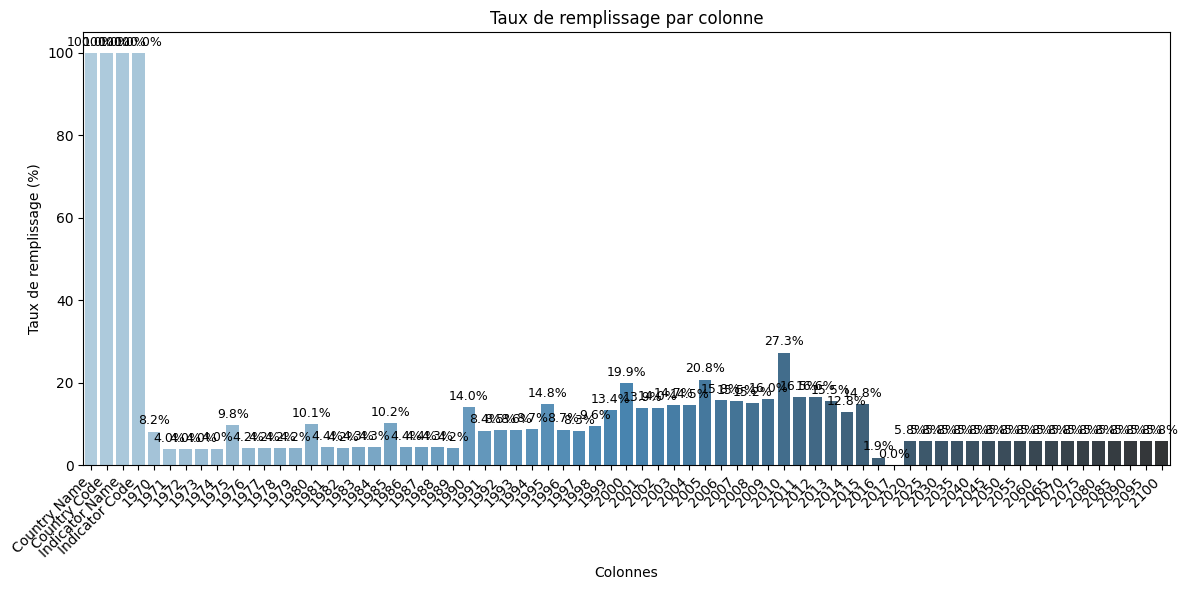

In [46]:
# 1. Calcul du taux de remplissage
taux = (ed_data.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

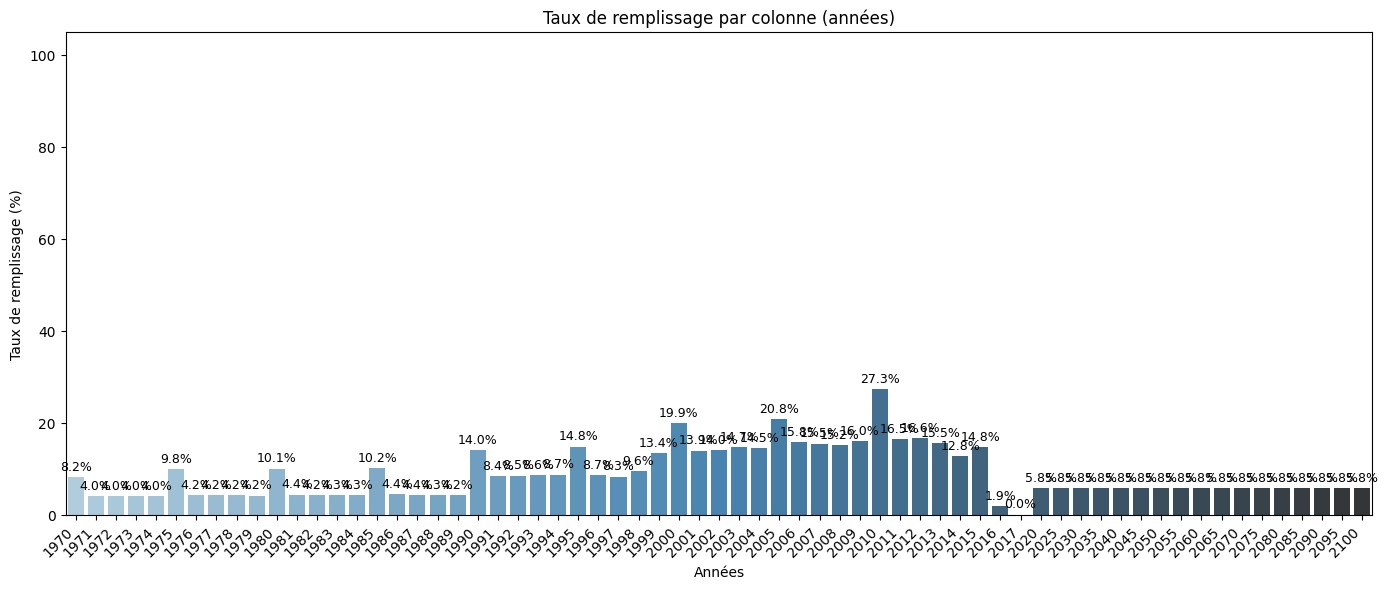

In [47]:
# 1. Sélectionner les colonnes de type année (supposons qu'elles commencent à l'index 4)
years_cols = ed_data.columns[4:]

# 2. Calculer le taux de remplissage pour chaque colonne
taux = ed_data[years_cols].notna().mean() * 100
taux = taux.round(2)

# 3. Transformation en DataFrame pour l'affichage
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 4. Affichage avec seaborn
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=df_taux,
    x='Colonne',
    y='TauxRemplissage',
    hue='Colonne',
    palette='Blues_d'
)

# 5. Ajouter les étiquettes au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Créons une matrice de corrélation (pearson) pour voir les corrélation entre les années

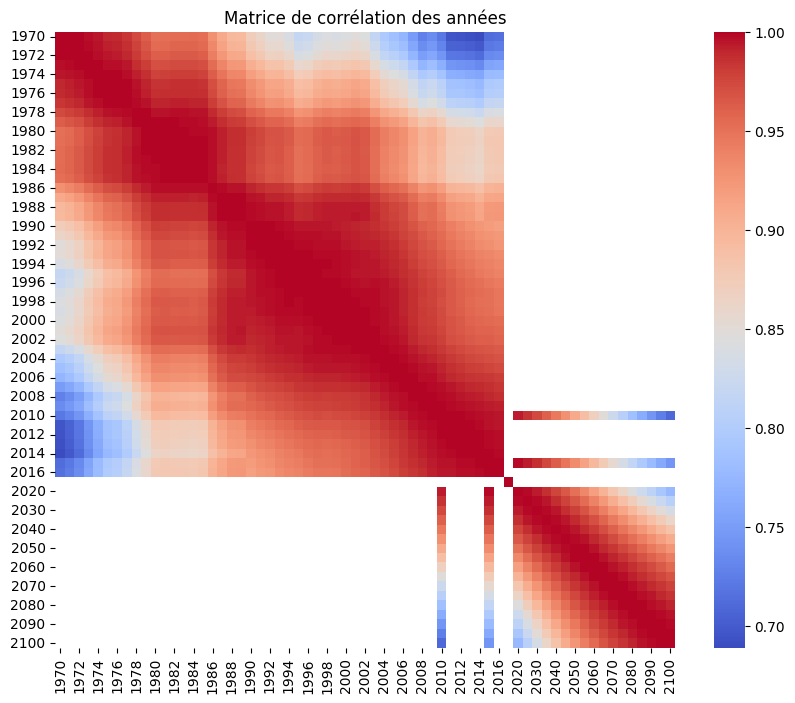

In [48]:
# Étape 1 : Sélectionnons les colonnes ayant des valeurs numériques ( dans le cas de ce DF, nous n'avons que les années)
years = ed_data.select_dtypes(include='number')

# Étape 2 : Calculer la matrice de corrélation avec la méthode pearson
years_correlation_matrix = years.corr(method='pearson')

# Etape 3 : Affichage de la matrice en mode Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(years_correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation des années")
plt.show()

Les données à partir de **2020** sont des projections. Celles au-delà de 2040 présentent un niveau d’incertitude élevé, rendant leur interprétation et leur exploitation moins fiables dans le cadre d’une prise de décision concrète.  

In [49]:
ed_data.shape

(886930, 69)

## Analyse de foot_note

### Description de chaque ligne

In [50]:
foot_note_info = foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


**CountryCode** : le code indicatif de chaque pays  
**SeriesCodes** : le code Série de chaque pays  
**Year** : l'année sur laquelle les datas sont données  
**DESCRIPTION** : source des données    

In [51]:
foot_note.rename(columns={'DESCRIPTION': 'Description'}, inplace=True)

### Nombre de lignes & colonnes 

In [52]:
foot_note.shape

(643638, 5)

### Calcul du nombre de doublons

In [53]:
foot_note.duplicated().sum()

0

Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [54]:
skim(foot_note)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 643638 │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA        ┃ NA %    ┃ mean   ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Unnamed: 4       │    643638 │     100 │    nan │   nan │   nan │   nan │   nan │   nan │    nan │         │  │
│ └──────────────────┴───────────┴─────────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CountryCode               │       0 │          0 │                            1 │                   643638 │  │
│ │ SeriesCode                │       0 │          0 │                            1 │                   643638 │  │
│ │ Year                      │       0 │          0 │                            1 │                   643638 │  │
│ │ Description               │       0 │          0 │                          3.4 │                  2186579 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

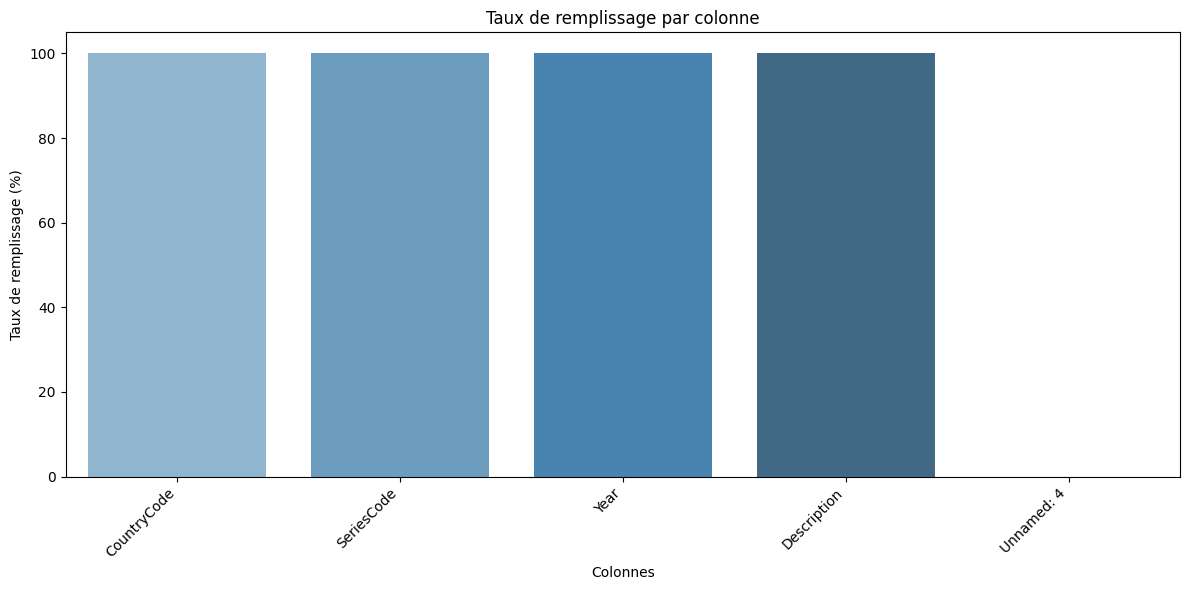

In [55]:
# 1. Calcul du taux de remplissage
taux = (foot_note.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 3. Affichage avec seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne',  palette='Blues_d')

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On remarque que les colonnes *CountryCode*, *SeriesCode*, *Year* et *DESCRIPTION* sont totalement remplies.  
La colonne *Unnamed :4* est totalement vide, on peut donc la supprimer.

In [56]:
foot_note_filtered = foot_note.drop("Unnamed: 4", axis=1)

In [57]:
foot_note_filtered.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'Description'], dtype='object')

La colonne **Unnamed :4**  a bien été supprimée.

In [58]:
foot_note_filtered.describe().T

,count,unique,top,freq
CountryCode,643638,239,LIC,7320
SeriesCode,643638,1558,SH.DYN.MORT,9226
Year,643638,56,YR2004,27128
Description,643638,9102,Country Data,191188


In [59]:
foot_note_filtered.value_counts("CountryCode")

CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64

In [60]:
foot_note_filtered.value_counts("SeriesCode")

SeriesCode
SH.DYN.MORT                  9226
SE.PRM.AGES                  8771
SE.PRM.DURS                  8771
SE.SEC.DURS                  8619
SE.SEC.AGES                  8581
                             ... 
UIS.XPubP.0                     1
UIS.XPubP.4                     1
UIS.XPubP.uk                    1
UIS.XSPENDP.1.FDPUB.FNCAP       1
UIS.XSPENDP.1.FDPUB.FNCUR       1
Name: count, Length: 1558, dtype: int64

In [61]:
foot_note_filtered.value_counts("Year")

Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
YR2001    25047
YR2008    25018
YR1999    24938
YR2007    24263
YR2006    23394
YR2009    22965
YR2010    22598
YR2011    17760
YR1998    14916
YR2012    13890
YR2013    13405
YR1994    11448
YR2014    11378
YR1992    11309
YR1996    11197
YR1995    11194
YR1997    11167
YR1991    11129
YR1993    11093
YR1990    10616
YR1986     9743
YR1985     9653
YR1989     9517
YR1981     9465
YR1984     9386
YR1988     9382
YR1987     9357
YR1983     9227
YR1982     9014
YR1980     8950
YR1979     8742
YR1976     8729
YR1972     8661
YR1975     8627
YR1977     8593
YR1978     8585
YR1973     8571
YR1974     8512
YR1971     8507
YR2015     6348
YR1970     5374
YR2016      819
YR2017      558
YR2035      144
YR2050      144
YR2045      144
YR2040      144
YR2030      140
YR2025      140
YR2020      140
yr2012       14
Name: count, dtype: int64

In [62]:
foot_note_filtered.value_counts("Description")

Description
Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
                                                   ...  
Uncertainty bound is 171.4 - 193.5                     1
Uncertainty bound is 171.4 - 195.2                     1
Uncertainty bound is 171.5 - 185.1                     1
Uncertainty bound is 171.5 - 189.7                     1
Uncertainty bound is 171.1 - 192.8                     1
Name: count, Length: 9102, dtype: int64

In [63]:
foot_note_filtered.shape

(643638, 4)

## Analyse de ed_series

### Description de chaque colonne

In [64]:
ed_series_info = ed_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

**Series Code**	Code unique identifiant chaque indicateur (ex: SP.POP.TOTL)  
  
**Topic	Catégorie** à laquelle appartient l’indicateur (ex: Population, Infrastructure)  
  
**Indicator Name**	Nom complet de l’indicateur (ex: Population, total)  
  
**Short definition**	Définition courte de l’indicateur (souvent absente ou redondante avec la longue)  
  
**Long definition**	Définition complète et précise de ce que mesure l’indicateur  
  
**Unit of measure**	Unité utilisée (ex. people, %, US dollars) — vide ici  
  
**Periodicity**	Fréquence de mise à jour (ex. Annual) — parfois vide  
  
**Base Period**	Année de base utilisée pour les données indexées ou relatives — ex. 2010  
  
**Other notes**	Commentaires complémentaires éventuels  
  
**Aggregation method**	Méthode d’agrégation (ex. Sum, Weighted Average) — peu remplie ici  
  
**Limitations and exceptions**	Limites ou particularités connues sur la donnée  
  
**Notes from original source**	Notes laissées par la source initiale (vide ici)  
  
**General comments**	Autres remarques générales  
  
**Source**	Nom de la source des données (ex. World Bank, ILO, WHO...)  
  
**Statistical concept and methodology**	Méthode statistique utilisée (définitions, modèles...)  
  
**Development relevance**	Lien entre l’indicateur et les enjeux de développement — très rarement rempli  
  
**Related source links**	Lien(s) vers les sources de données  
  
**Other web links**	Lien(s) divers ou complémentaires — vide ici  
  
**Related indicators**	Autres indicateurs liés ou similaires — vide ici  
  
**License Type**	Type de licence d’utilisation (ex: Open, Proprietary)  


### Nombre de lignes & colonnes 

In [65]:
ed_series.shape

(3665, 21)

### Calcul du nombre de doublons

In [66]:
ed_series.duplicated().sum()

0

Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [67]:
skim(ed_series)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3665   │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %   ┃ mean   ┃ sd   ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Unit of measure            │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Notes from original source │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Other web links            │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Related indicators         │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ License Type               │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Unnamed: 20                │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ └────────────────────────────┴────────┴────────┴────────┴──────┴──────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Series Code                         │        0 │          0 │                       1 │               3668 │  │
│ │ Topic                               │        0 │          0 │                     1.6 │               6046 │  │
│ │ Indicator Name                      │        0 │          0 │                      11 │              41939 │  │
│ │ Short definition                    │     1509 │      41.17 │                      40 │             148277 │  │
│ │ Long definition                     │        0 │          0 │                      72 │             265471 │  │
│ │ Periodicity                         │     3566 │       97.3 │                   0.027 │                 99 │  │
│ │ Base Period                         │     3351 │      91.43 │                    0.34 │               1238 │  │
│ │ Other notes                         │     3113 │      84.94 │                    0.21 │                780 │  │
│ │ Aggregation method                  │     3618 │      98.72 │                   0.023 │                 84 │  │
│ │ Limitations and exceptions          │     3651 │      99.62 │                    0.54 │               1990 │  │
│ │ General comments                    │     3651 │      99.62 │                    0.12 │                447 │  │
│ │ Source                              │        0 │    

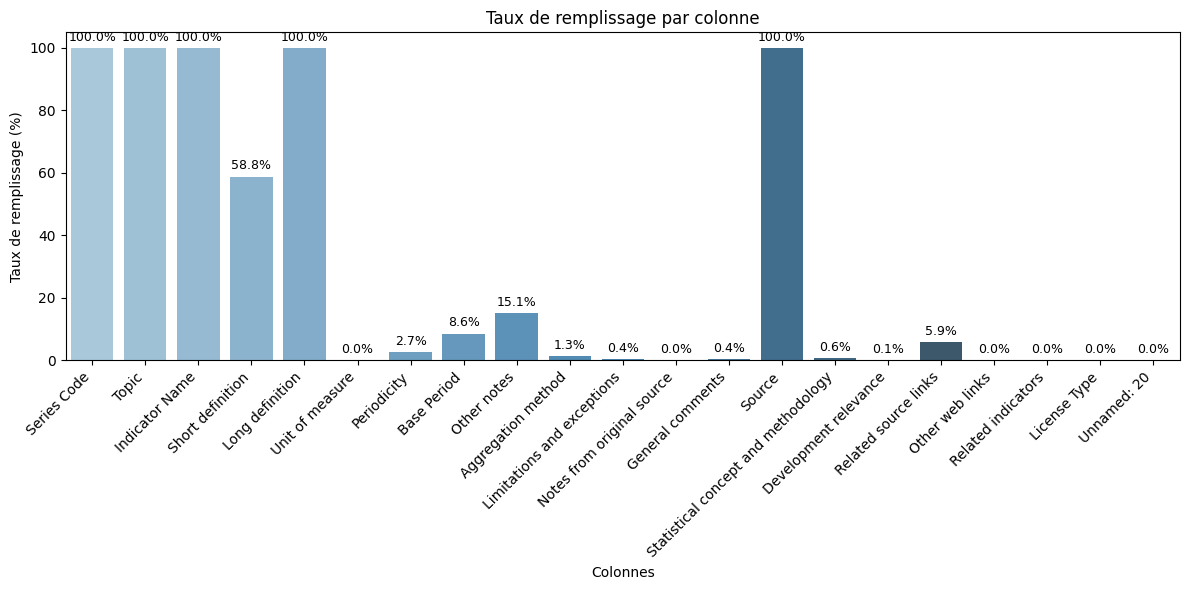

In [68]:
# 1. Calcul du taux de remplissage
taux = (ed_series.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_taux,
    x='Colonne',
    y='TauxRemplissage',
    hue='Colonne',          
    palette='Blues_d',
    legend=False             
)

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On peut prendre pour hypothèse que les colonnes remplies à moins de 60% ne contiennent pas assez de valeurs exploitables.

In [69]:
ed_series_clean = ed_series.loc[:, ed_series.notnull().mean() >= 0.6]

In [70]:
ed_series_clean.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

In [71]:
ed_series_clean.shape

(3665, 5)

Il n'y a plus que **5 colonnes** au lieu de **22**

In [72]:
ed_series_clean.describe().T

,count,unique,top,freq
Series Code,3665,3665,XGDP.56.FSGOV.FDINSTADM.FFD,1
Topic,3665,37,Learning Outcomes,1046
Indicator Name,3665,3665,Government expenditure in tertiary institution...,1
Long definition,3665,2060,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,215
Source,3665,31,UNESCO Institute for Statistics,1269


## Nettoyage du DF Country

In [73]:
country_filtered.shape

(241, 28)

In [74]:
country_filtered_info = country_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 28 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Country Name                                       241 non-null    object 
 2   Currency Unit                                      215 non-null    object 
 3   Special Notes                                      145 non-null    object 
 4   Region                                             214 non-null    object 
 5   Income Group                                       214 non-null    object 
 6   WB-2 code                                          240 non-null    object 
 7   National accounts base year                        205 non-null    object 
 8   National accounts reference year                   32 non-null     float64
 9   SNA price 

In [75]:
len(country_filtered['Country Code'])

241

In [76]:
valid_codes = [c.alpha_3 for c in pycountry.countries]

### Première méthode avec liste des payx inexistants

In [77]:
false_country = country_filtered[~country_filtered['Country Code'].isin(valid_codes)]['Country Code'].unique().tolist()
false_country_names = country_filtered[country_filtered['Country Code'].isin(false_country)][['Country Code', 'Country Name']]
false_country_names

,Country Code,Country Name
5,ARB,Arab World
35,CHI,Channel Islands
57,EAP,East Asia & Pacific (developing only)
58,EAS,East Asia & Pacific (all income levels)
59,ECA,Europe & Central Asia (developing only)
60,ECS,Europe & Central Asia (all income levels)
63,EMU,Euro area
68,EUU,European Union
89,HIC,High income
92,HPC,Heavily indebted poor countries (HIPC)


On remarque que des vrais Pays s'affiche dans cette liste. Nous devons donc leur réafecter leur bon code. ( Kosovo et Channel Islands)

In [78]:
# Dictionnaire de correction manuelle
corrections = {
    "XKX": "XK",
    "CHI": "GBR", 
}

# Appliquer les corrections dans country_clean
country_filtered['Country Code'] = country_filtered['Country Code'].replace(corrections)

# Liste complète des codes valides reconnus par pycountry
valid_codes = [c.alpha_3 for c in pycountry.countries]

# Supprimer les lignes qui ont un code toujours invalide après correction
country_clean = country_filtered[country_filtered['Country Code'].isin(valid_codes)]

codes_deleted = country_filtered[~country_filtered['Country Code'].isin(valid_codes)][['Country Code', 'Country Name']]
codes_deleted

,Country Code,Country Name
5,ARB,Arab World
57,EAP,East Asia & Pacific (developing only)
58,EAS,East Asia & Pacific (all income levels)
59,ECA,Europe & Central Asia (developing only)
60,ECS,Europe & Central Asia (all income levels)
63,EMU,Euro area
68,EUU,European Union
89,HIC,High income
92,HPC,Heavily indebted poor countries (HIPC)
116,LAC,Latin America & Caribbean (developing only)


In [79]:
country_clean.head(5)

,Country Code,Country Name,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [80]:
country_clean.shape

(215, 28)

### Deuxième méthode avec merge

In [81]:
### On crée un DF avec une colonne uniquem ' Country Code'
valid_codes_df = pd.DataFrame(valid_codes, columns=['Country Code'])

In [82]:
### On merge les DF country_filtered & valid_codes_df avec 'inner' = on ne garde que les lignes de country_filtered 
### dont le 'Country Code' est présent dans le DF valid_codes_df
country_clean_v2 = country_filtered.merge(valid_codes_df, on='Country Code', how='inner')


In [83]:
country_clean_v2.shape

(215, 28)

#### Vérification

In [84]:
## On crée 2 nouveaux DF, partant de country_clean & country_clean_v2, en triant toutes les colonnes 
### par ordre alphabétique & ordre croissant des valeurs, & on réinitialise les index.
country_clean_sorted = country_clean.sort_values(by=country_clean.columns.tolist()).reset_index(drop=True)
country_clean_v2_sorted = country_clean_v2.sort_values(by=country_clean_v2.columns.tolist()).reset_index(drop=True)

### On utilise la fonction equals pour voir si les DF sont identiques : renvoie TRUE si vrai, FALSE si faux
country_clean_sorted.equals(country_clean_v2_sorted)


True

**Les deux dataframes sont bien identiques**

## Indicateurs à supprimer

Pour trouver quels indicateurs sont à supprimer, nous allons partir de **ed_series_clean**, qui contient les **Series Codes** et les **Topic** et **ed_data_clean** qui contient les **Indicator Code** et **Indicator Name**, et **country_clean** qui nous donne les informations générales sur les pays.

In [85]:
ed_series_clean = ed_series_clean.copy()
ed_data_clean = ed_data.copy()
country_clean = country_clean.copy()

In [86]:
country_clean.columns

Index(['Country Code', 'Country Name', 'Currency Unit', 'Special Notes',
       'Region', 'Income Group', 'WB-2 code', 'National accounts base year',
       'National accounts reference year', 'SNA price valuation',
       'Lending category', 'Other groups', 'System of National Accounts',
       'Alternative conversion factor', 'PPP survey year',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard', 'Latest population census',
       'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

Certaines de ces colonnes ont peu d'intêret pour notre etude.

In [124]:
useless_columns_country = [
    'WB-2 code', 'National accounts base year', 'National accounts reference year',
    'SNA price valuation', 'Other groups', 'System of National Accounts',
    'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use',
    'External debt Reporting status', 'System of trade', 'Government Accounting concept',
    'IMF data dissemination standard', 'Source of most recent Income and expenditure data',
    'Vital registration complete', 'Latest agricultural census', 'Latest industrial data',
    'Latest trade data', 'Latest water withdrawal data'
]


In [125]:
country_filtered = country_clean.drop(useless_columns_country , axis=1)

In [126]:
country_filtered.columns

Index(['Country Code', 'Country Name', 'Currency Unit', 'Special Notes',
       'Region', 'Income Group', 'Lending category',
       'Latest population census', 'Latest household survey'],
      dtype='object')

In [87]:
ed_series_clean.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

In [88]:
ed_data_clean.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

On peut créer un nouveau DF qui contient les colonnes **Country Name**, **Country Code**, **Indicator Code** , **Indicator Name** ainsi que toutes les années.

In [127]:
df_indicators = ed_data_clean.merge(ed_series_clean[['Indicator Name', 'Series Code', 'Topic']], on='Indicator Name', how='left')
df_indicators = df_indicators.merge(country_filtered, on='Country Code', how='inner')

In [128]:
df_indicators.shape

(787975, 79)

Nous avons vu lors du nettoyage du **DF Country** que certains pays inexistants étaient dans la liste des **Country Code**. Il faut donc les enlever

In [129]:
df_indicators.columns

Index(['Country Name_x', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Series Code', 'Topic', 'Country Name_y',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group',
       'Lending category', 'Latest population census',
       'Latest household survey'],
      dtype='object')

In [155]:
df_indicators.rename(columns={'Country Name_x': 'Country Name'}, inplace=True)
df_indicators.drop("Country Name_y", axis=1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2100,Series Code,Topic,Currency Unit,Special Notes,Region,Income Group,Lending category,Latest population census,Latest household survey
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,UIS.NERA.2,Secondary,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,UIS.NERA.2.F,Secondary,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,UIS.NERA.2.GPI,Secondary,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,UIS.NERA.2.M,Secondary,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,SE.PRM.TENR,Primary,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787970,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,UIS.LP.Ag15t24.M,Literacy,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,Blend,2012,"Demographic and Health Survey (DHS), 2010/11"
787971,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,SE.ADT.1524.LT.ZS,Literacy,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,Blend,2012,"Demographic and Health Survey (DHS), 2010/11"
787972,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,SE.ADT.1524.LT.FE.ZS,Literacy,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,Blend,2012,"Demographic and Health Survey (DHS), 2010/11"
787973,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,SE.ADT.1524.LT.FM.ZS,Literacy,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,Blend,2012,"Demographic and Health Survey (DHS), 2010/11"


### Premier filtre sur les Années

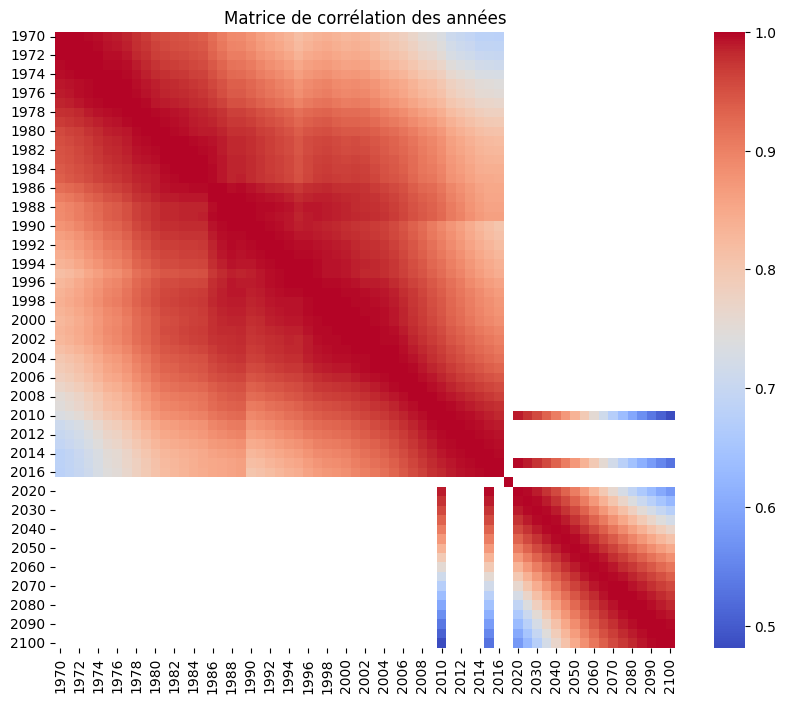

In [156]:
# Étape 1 : Sélectionner les colonnes numériques
years = df_indicators.select_dtypes(include='number')

# Étape 4 : Calculer la matrice de corrélation
years_correlation_matrix = years.corr(method='pearson')

# Étape 5 : Afficher la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(years_correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation des années")
plt.show()

Plus les années sont proches temporellement, plus l'indice de corrélation est fort.  
On peut noter également que pour les années **~>2020** les indices sont plus faibles : c'est normal, ce sont des projections.

#### Matrice de Corrélation

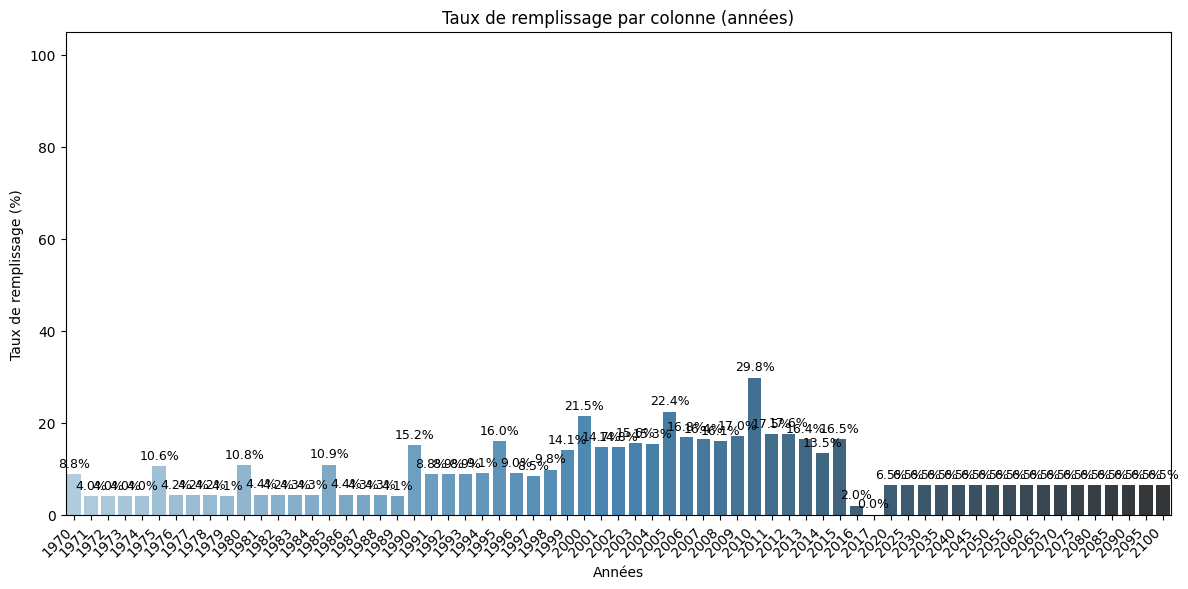

In [131]:
# 1.On garde les colonnes dans df_indicators qui sont des nombres , dans notre cas, il n'y a que les années
years_cols = [col for col in df_indicators.columns if col.isdigit()]

# 2. Calculer la proportion de valeurs non manquantes par année
years_proportion_completed = df_indicators[years_cols].notna().mean()

# 3. Transformation en DataFrame pour seaborn
df_taux = (years_proportion_completed * 100).round(2).reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 4. Affichage
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')

### Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Les années après **2016** sont peu remplies : c'est normal, ce sont des projections sur l'avenir. L'intégralité des indicateurs ne peut pas avoir de valeurs.
idem pour les valeurs avant **1990**

bfill = si NaN alors on rempli avec la valeur d'avant  
faire les counts & voir taux de remplissage

Séparer colonne future & passé - qui est rempli comment. D'abord analyser le passé puis après le futur

In [205]:
# 1. Construire la liste des années à supprimer : celles < 1990 et celles > 2040
years_passed = list(np.arange(1970, 2016))
years_futur = list(np.arange(2016, 2101))


# 2. Convertir ces années en chaînes
years_passed = [str(year) for year in years_passed]
years_futur = [str(year) for year in years_futur]

## Les colonnes du DF sont des chaînes. On transforme donc chaque année de la liste crée en chaîne de caractères.

# 3. Filtrer les colonnes à supprimer 
cols_to_keep_futur = [col for col in df_indicators.columns if not col.isdigit() or col not in years_passed]
cols_to_keep_passed = [col for col in df_indicators.columns if not col.isdigit() or col not in years_futur]

## On garde : les colonnes non numériques (col if not col.isdigit()
## Pour ces colonnes on garde les colonnes non présentes dans la liste years_to_delete_str

# 4. Créer un nouveau DataFrame avec ces colonnes
df_indicators_futur = df_indicators[cols_to_keep_futur]
df_indicators_passed = df_indicators[cols_to_keep_passed]


### Les années de 1970 à 2018

#### Filtre sur les Topic

Mark veut étendre *academy* , un site de formation en ligne pour les lycéens et  +.  
Il y a plusieurs types de Topic à regarder :  
- Population du pays
- Richesse du pays
- Accès à Internet
- L'éducation

Prouver le choix de chaque Topic. Rajouter Roleplay ou enlever Education Equality.  Regarder si les gens sont riches.  Avoir accès a internet. taille de la population visée. (1 truc d'éducation, 1 truc d'argent, internet, 1 truc de population)  
topic d'éducation = comment choisir ? les 3 autres ok pour commencer.
puis après topic d'éducation.
Si 4 indicateurs : comment choisir l'indicateur == le plus rempli.

In [134]:
df_indicators_passed= df_indicators_passed.rename(columns={'Country Name_x': 'Country Name'})

In [135]:
topic_list = df_indicators_passed['Topic'].unique().tolist()
topic_list

['Secondary',
 'Primary',
 'Literacy',
 'Teachers',
 'EMIS',
 'Expenditures',
 'Attainment',
 'Education Equality',
 'Background',
 'Learning Outcomes',
 'Early Childhood Education',
 'Tertiary',
 'Post-Secondary/Non-Tertiary',
 nan,
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
 'Economic Policy & Debt: Purchasing power parity',
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
 'Pre-Primary',
 'Infrastructure: Communications',
 'Social Protection & Labor: Labor force structure',
 'Health: Population: Dynamics',
 'Population',
 'Health: Population: Structure',
 'Health: Risk factors',
 'Early Child Development (SABER)',
 'Education Management Information Systems (SABER)',
 'Engaging the Private Sector (SABER)',
 'School Finance (SABER)',
 'School Health and School Feeding (SABER)',
 'Student Assessment (SABER)',
 'Teachers (SABER)',
 'Tertiary Education (SABER)',
 'Workforce Development (SABER)']

In [136]:
topics_to_keep = [
    'Population',
    'Infrastructure: Communications',
    'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
]

#### Taux de remplissage de chaque colonne par Topic

Regardons maintenant le taux de remplissage de chaque topic

In [207]:
# 2. Filtrer les lignes du DataFrame df_indicators contenant ces topics
df_filtered_topics = df_indicators_passed[df_indicators_passed['Topic'].isin(topics_to_keep)]


# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_topic = df_filtered_topics.groupby('Topic')[years_passed].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_topic.reset_index()
df_taux.columns = ['Topic', 'Taux de remplissage (%)']
df_taux

,Topic,Taux de remplissage (%)
0,Economic Policy & Debt: National accounts: Atl...,72.86
1,Infrastructure: Communications,35.74
2,Population,54.47


Au vu des taux de remplissage par **Topic** , on peut penser que certaines années sont vides.

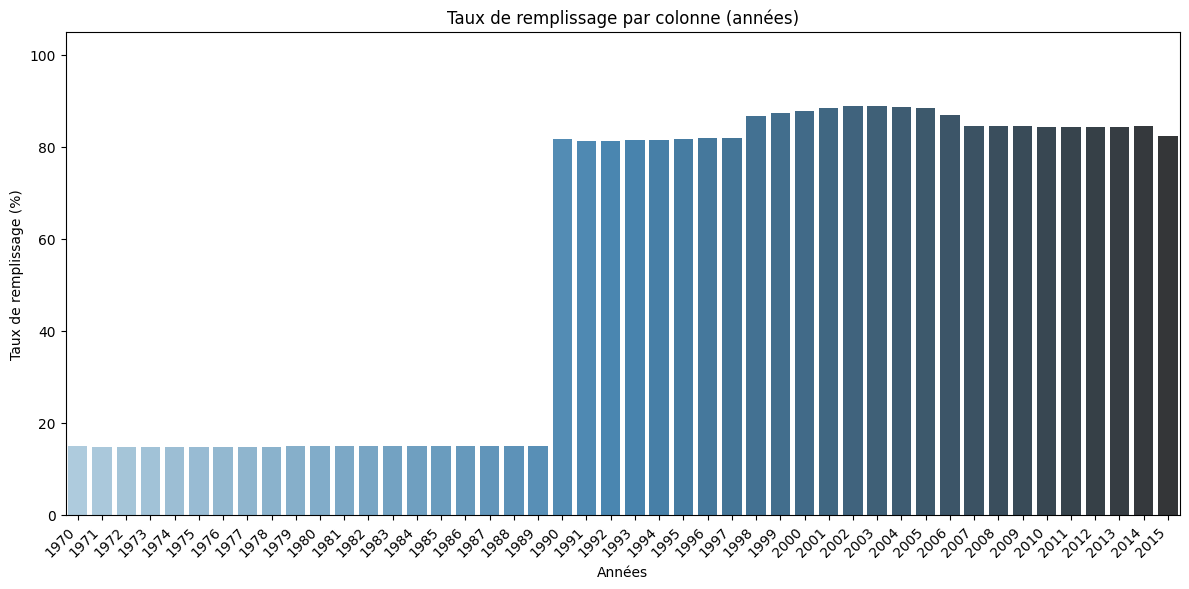

In [227]:
# 1. Calculer la proportion de valeurs non manquantes par année
years_proportion_completed = df_filtered_topics[years_passed].notna().mean()

# 2. Transformation en DataFrame pour seaborn
df_taux = (years_proportion_completed * 100).round(2).reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 3. Affichage
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')


plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On remarque que les années avant 1990 sont peu remplis. Regardons en détail chacun des Topic pour voir quels pays n'ont pas beaucoup de données.

### INDICATEURS POPULATION

In [209]:
topic_population = df_filtered_topics[df_filtered_topics['Topic'] == 'Population']
topic_population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'Series Code', 'Topic', 'Country Name_y', 'Currency Unit',
       'Special Notes', 'Region', 'Income Group', 'Lending category',
       'Latest population census', 'Latest household survey'],
      dtype='object')

In [210]:
topic_population.rename(columns={'Country Name_x': 'Country Name'})

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,Series Code,Topic,Country Name_y,Currency Unit,Special Notes,Region,Income Group,Lending category,Latest population census,Latest household survey
2308,Afghanistan,AFG,"Population of compulsory school age, both sexe...",UIS.SAP.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,UIS.SAP.CE,Population,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
2309,Afghanistan,AFG,"Population of compulsory school age, female (n...",UIS.SAP.CE.F,NaN,NaN,NaN,NaN,NaN,NaN,...,UIS.SAP.CE.F,Population,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
2310,Afghanistan,AFG,"Population of compulsory school age, male (num...",UIS.SAP.CE.M,NaN,NaN,NaN,NaN,NaN,NaN,...,UIS.SAP.CE.M,Population,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
2311,Afghanistan,AFG,Population of the official age for lower secon...,SP.SEC.LTOT.IN,735073.0,758586.0,782679.0,806194.0,830006.0,886604.0,...,SP.SEC.LTOT.IN,Population,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
2312,Afghanistan,AFG,Population of the official age for lower secon...,SP.SEC.LTOT.FE.IN,360482.0,372541.0,384627.0,396115.0,407524.0,434864.0,...,SP.SEC.LTOT.FE.IN,Population,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786834,Zimbabwe,ZWE,"Population, ages 7-13, male",SP.POP.0713.MA.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,SP.POP.0713.MA.UN,Population,Zimbabwe,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,Blend,2012,"Demographic and Health Survey (DHS), 2010/11"
786835,Zimbabwe,ZWE,"Population, ages 7-13, total",SP.POP.0713.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,SP.POP.0713.TO.UN,Population,Zimbabwe,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,Blend,2012,"Demographic and Health Survey (DHS), 2010/11"
786836,Zimbabwe,ZWE,"Population, ages 7-9, female",SP.POP.0709.FE.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,SP.POP.0709.FE.UN,Population,Zimbabwe,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,Blend,2012,"Demographic and Health Survey (DHS), 2010/11"
786837,Zimbabwe,ZWE,"Population, ages 7-9, male",SP.POP.0709.MA.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,SP.POP.0709.MA.UN,Population,Zimbabwe,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,Blend,2012,"Demographic and Health Survey (DHS), 2010/11"


In [211]:
topic_population['Indicator Name'].unique()

array(['Population of compulsory school age, both sexes (number)',
       'Population of compulsory school age, female (number)',
       'Population of compulsory school age, male (number)',
       'Population of the official age for lower secondary education, both sexes (number)',
       'Population of the official age for lower secondary education, female (number)',
       'Population of the official age for lower secondary education, male (number)',
       'Population of the official age for post-secondary non-tertiary education, both sexes (number)',
       'Population of the official age for post-secondary non-tertiary education, female (number)',
       'Population of the official age for post-secondary non-tertiary education, male (number)',
       'Population of the official age for pre-primary education, both sexes (number)',
       'Population of the official age for pre-primary education, female (number)',
       'Population of the official age for pre-primary education, mal

Pour savoir quel indicateurs choisir, regardons les 20 indicateurs ayant le plus de pays où l'on a des données.

In [212]:
df_subset = topic_population[topic_population['Indicator Name'].isin(indicator_population_list)]
nb_country_filled = df_subset.groupby('Indicator Name')[years_passed].apply(
    lambda x: (x.notna().sum(axis=1) > 0).sum()
)
nb_country_filled

Indicator Name
Population of compulsory school age, both sexes (number)                             178
Population of compulsory school age, female (number)                                 177
Population of compulsory school age, male (number)                                   177
Population of the official age for lower secondary education, both sexes (number)    201
Population of the official age for lower secondary education, female (number)        201
                                                                                    ... 
Population, ages 7-13, male                                                          193
Population, ages 7-13, total                                                         193
Population, ages 7-9, female                                                         193
Population, ages 7-9, male                                                           193
Population, ages 7-9, total                                                          193
Length

In [214]:
# 1. Copie du DF de base avant de faire un bfill
df_indicators_selected = topic_population.copy()

# 2. Appliquer un bfill pour récupérer les données "rattrapables" 
years_cols = [col for col in df_indicators_selected.columns if col.isdigit()]
df_indicators_selected[years_cols] = df_indicators_selected[years_cols].bfill(axis=1)

# 3. Fonction pour analyser chaque indicateur 
def analyse_filled_indicators(df, years):
    resultats = []

    for indicateur, group in df.groupby('Indicator Name'):
        data = group[years]
        # Combien de fois chaque année est remplie (par pays)
        taux_by_years = data.notna().sum()
        total_values = taux_by_years.sum()
        years_completed = taux_by_years[taux_by_years > 0].index.astype(int)
        
        if len(years_completed) == 0:
            continue

        resultats.append({
            'Indicator Name': indicateur,
            'Total valeurs non nulles': total_values,
            'Nb années remplies': len(years_completed),
            'Première année': years_completed.min(),
            'Dernière année': years_completed.max(),
            'Années récentes (≥2000)': sum(years_completed >= 2000),
        })

    return pd.DataFrame(resultats).sort_values(by='Années récentes (≥2000)', ascending=False)

# 4. Afficher les Indicators les mieux remplis
df_result_pop_indicators = analyse_filled_indicators(df_indicators_selected, years_cols)
df_result_pop_indicators

,Indicator Name,Total valeurs non nulles,Nb années remplies,Première année,Dernière année,Années récentes (≥2000)
160,"Population, ages 7-9, total",8772,46,1970,2015,16
145,"Population, ages 6-9, total",8772,46,1970,2015,16
146,"Population, ages 7-10, female",8772,46,1970,2015,16
147,"Population, ages 7-10, male",8772,46,1970,2015,16
148,"Population, ages 7-10, total",8772,46,1970,2015,16
...,...,...,...,...,...,...
7,Population of the official age for post-second...,7559,46,1970,2015,16
8,Population of the official age for post-second...,7559,46,1970,2015,16
1,"Population of compulsory school age, female (n...",7865,45,1970,2014,15
2,"Population of compulsory school age, male (num...",7865,45,1970,2014,15


Regardons maintenant le nombre de pays où les données peuvent être remplies après **2020** grace à un **bfill**

In [232]:
# 1. Sélection des années >= 2020
years_post_2000 = [year for year in years_passed if int(year) >= 2000]

# 2. Copie du DF avant de faire un bfill
df_indic_bfill = df_indicators_selected.copy() 

# 3. Appliquer un bfill pour simuler les données récupérables
df_indic_bfill[years_passed] = df_indicators_selected[years_passed].bfill(axis=1)

# 4. Calculer pour chaque indicateur le nombre de pays ayant des valeurs > 2000
resultats = []

for indicateur, groupe in df_indicators_selected.groupby('Indicator Name'):
    df_ = groupe.copy()
    df_post_2000 = df_[years_post_2000]

    # Pays avec au moins une valeur non nulle après 2000
    country_with_ = df_post_2000.dropna(how='all')
    nb_pays = pays_avec_valeurs.shape[0]

    resultats.append({
        'Indicator Name': indicateur,
        'Nb pays avec données >2000': nb_pays
    })

# 6. Résultat final
df_country_post2000 = pd.DataFrame(resultats).sort_values(by='Nb pays avec données >2000', ascending=False)
df_country_post2000.head(20)

,Indicator Name,Nb pays avec données >2000
160,"Population, ages 7-9, total",193
145,"Population, ages 6-9, total",193
146,"Population, ages 7-10, female",193
147,"Population, ages 7-10, male",193
148,"Population, ages 7-10, total",193
149,"Population, ages 7-11, female",193
150,"Population, ages 7-11, male",193
151,"Population, ages 7-11, total",193
152,"Population, ages 7-12, female",193
9,Population of the official age for pre-primary...,193


Affichage sous forme de graphique à barre.

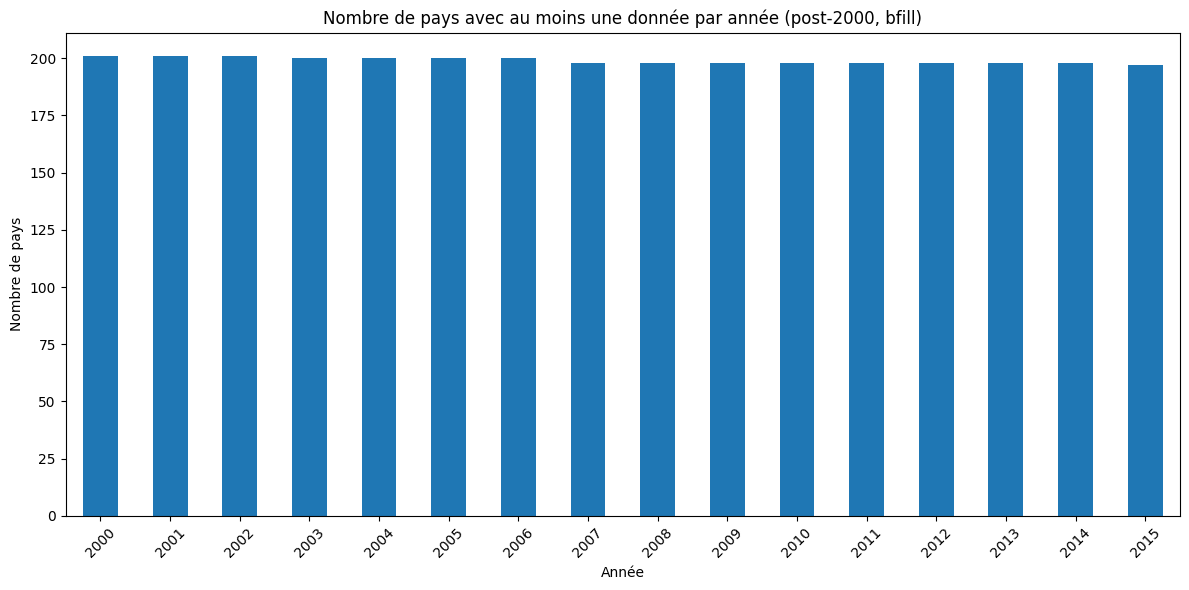

In [222]:
# 1. Repartir du DataFrame avec infos pays + années
df_indicators_selected = topic_population.copy()

# 2. Appliquer un bfill pour récupérer les valeurs "rattrapables"
df_indic_bfill = df_indicators_selected.copy()
df_indic_bfill[years_cols] = df_indic_bfill[years_cols].bfill(axis=1)

# 3. Calculer les pays avec au moins une donnée non manquante par année
country_not_nan = df_indic_bfill.groupby('Country Name')[years_post_2000].apply(lambda g: g.notna().any())

# 4. Compter le nombre de pays avec des données chaque année
nb_country_by_year = country_not_nan.sum(axis=0)

# 5. Affichage

plt.figure(figsize=(12,6))
nb_country_by_year.plot(kind='bar')
plt.title("Nombre de pays avec au moins une donnée par année (post-2000, bfill)")
plt.xlabel("Année")
plt.ylabel("Nombre de pays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Les indicateurs étant bien remplis après un **bfill**, on peut choisir ceux qui nous interesse le plus.

In [231]:
# 1. Repartir du DataFrame source (par ex. topic_population)
df_indicators_selected = topic_population.copy()

# 2. Colonnes années
years_cols = [col for col in df_indicators_selected.columns if col.isdigit()]

# 3. Calcul du taux de remplissage par indicateur
taux_remplissage = (
    df_indicators_selected
    .groupby('Indicator Name')[years_cols]
    .apply(lambda x: x.notna().sum().sum() / x.size * 100)
    .round(2)
    .sort_values(ascending=False)
)

# 4. Transformation en DataFrame
df_taux_indicateur = taux_remplissage.reset_index()
df_taux_indicateur.columns = ['Indicator Name', 'Taux remplissage (%)']

# 5. Affichage des 10 premiers indicateurs les mieux remplis
df_taux_indicateur.head(20)

,Indicator Name,Taux remplissage (%)
0,Population of the official age for pre-primary...,89.06
1,Population of the official age for pre-primary...,89.06
2,Population of the official age for pre-primary...,89.06
3,Population of the official age for upper secon...,88.89
4,Population of the official age for upper secon...,88.89
5,Population of the official age for upper secon...,88.89
6,Population of the official age for lower secon...,88.87
7,Population of the official age for lower secon...,88.87
8,Population of the official age for lower secon...,88.87
9,Population of the official age for secondary e...,88.84


In [225]:
# 1. Récupérer la liste des 20 indicateurs les mieux remplis
top20_indicators = df_indicators_selected.head(20)['Indicator Name'].tolist()

# 2. Filtrer df_filtered_topics avec ces indicateurs
df_indic_selected = df_filtered_topics[
    df_filtered_topics['Indicator Name'].isin(top20_indicators)
].copy()
# 3. Afficher la liste des 20 indicateurs les mieux remplis
df_indic_selected['Indicator Name'].unique()

array(['Population of compulsory school age, both sexes (number)',
       'Population of compulsory school age, female (number)',
       'Population of compulsory school age, male (number)',
       'Population of the official age for lower secondary education, both sexes (number)',
       'Population of the official age for lower secondary education, female (number)',
       'Population of the official age for lower secondary education, male (number)',
       'Population of the official age for post-secondary non-tertiary education, both sexes (number)',
       'Population of the official age for post-secondary non-tertiary education, female (number)',
       'Population of the official age for post-secondary non-tertiary education, male (number)',
       'Population of the official age for pre-primary education, both sexes (number)',
       'Population of the official age for pre-primary education, female (number)',
       'Population of the official age for pre-primary education, mal

Les indicateurs qui différencient les hommes des femmes ne sont pas utiles dans notre cas. Nous pouvons donc déjà les supprimer

In [226]:
# 1. Création d'un mask : on veut supprimer les lignes contenant 'male' ou 'female'
mask = df_indic_selected['Indicator Name'].str.contains('male|female', case=False, na=False)
# 2. On crée un nouveau DF où l'on enlève le mask précédemment crée
df_indic_selected_filtered = df_indic_selected[~mask]
# 3. Affichage des topics restants
df_indic_selected_filtered['Indicator Name'].unique()

array(['Population of compulsory school age, both sexes (number)',
       'Population of the official age for lower secondary education, both sexes (number)',
       'Population of the official age for post-secondary non-tertiary education, both sexes (number)',
       'Population of the official age for pre-primary education, both sexes (number)',
       'Population of the official age for primary education, both sexes (number)',
       'Population of the official age for secondary education, both sexes (number)',
       'Population of the official age for tertiary education, both sexes (number)'],
      dtype=object)

Comme le projet de Mark concerne les personnes étant au lycée ou +, on peut supprimer les indicateurs qui concernent les populations ayant des niveaux d'éducation plus faibles. Cependant, il peut être utile de garder le topic 'Population, ages 15-24, total'.

In [110]:
indicators_population_to_keep = [
 'Population of the official age for secondary education, both sexes (number)',
 'Population of the official age for upper secondary education, both sexes (number)',
 'Population of the official entrance age to secondary general education, both sexes (number)',
 'Population, ages 15-24, total']

In [111]:
# 1. Filtrer pour ne garder que les indicateurs qui nous interessse
df_subset_pop = df_indic_selected_filtered[df_indic_selected_filtered['Indicator Name'].isin(indicators_population_to_keep)]

# Calcul du taux de remplissage par année, en %
taux_filled_by_year = df_subset_pop.groupby('Indicator Name')[years_cols].apply(lambda x: x.notna().mean())

taux_filled_by_year = (taux_remplissage_par_annee * 100).round(2)
taux_filled_by_year

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Population of the official age for secondary education, both sexes (number)",88.37,87.91,87.91,87.91,87.91,87.91,87.91,87.91,87.91,87.91,...,90.70,90.70,91.16,90.23,90.70,90.70,90.70,91.16,90.70,73.49
"Population of the official age for upper secondary education, both sexes (number)",88.37,87.91,87.91,87.91,87.91,87.91,87.91,87.91,87.91,87.91,...,90.70,90.70,91.16,90.70,91.16,91.16,91.16,91.63,90.70,73.49
"Population of the official entrance age to secondary general education, both sexes (number)",88.37,87.91,87.91,87.91,87.91,87.91,87.91,87.91,87.91,87.91,...,89.77,89.77,90.23,89.30,90.70,90.23,90.23,89.30,86.98,87.44


Faisons une copie du DF taux_remplissage_par_année, et mergeons le avec df_indicators_passed pour voir si certains pays n'ayant aucune valeurs remplies.

In [233]:
# On filtre tle DataFrame principal avec les indicateurs que l'on a gardé
df_topic_population = topic_population[topic_population['Indicator Name'].isin(indicators_population_to_keep)]
df_topic_population = df_topic_population.rename(columns={'Country Name_x': 'Country Name'})

df_topic_population.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,Series Code,Topic,Country Name_y,Currency Unit,Special Notes,Region,Income Group,Lending category,Latest population census,Latest household survey
2323,Afghanistan,AFG,Population of the official age for secondary e...,SP.SEC.TOTL.IN,1394376.0,1433848.0,1479039.0,1526503.0,1574259.0,1682117.0,...,SP.SEC.TOTL.IN,Population,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
2332,Afghanistan,AFG,Population of the official age for upper secon...,SP.SEC.UTOT.IN,659303.0,675262.0,696360.0,720309.0,744253.0,795513.0,...,SP.SEC.UTOT.IN,Population,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"
2338,Afghanistan,AFG,Population of the official entrance age to sec...,UIS.SAP.23.GPV.G1,254849.0,262671.0,270065.0,277689.0,286389.0,306355.0,...,UIS.SAP.23.GPV.G1,Population,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,IDA,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11"


#### Remplissage des Topic Population par Pays

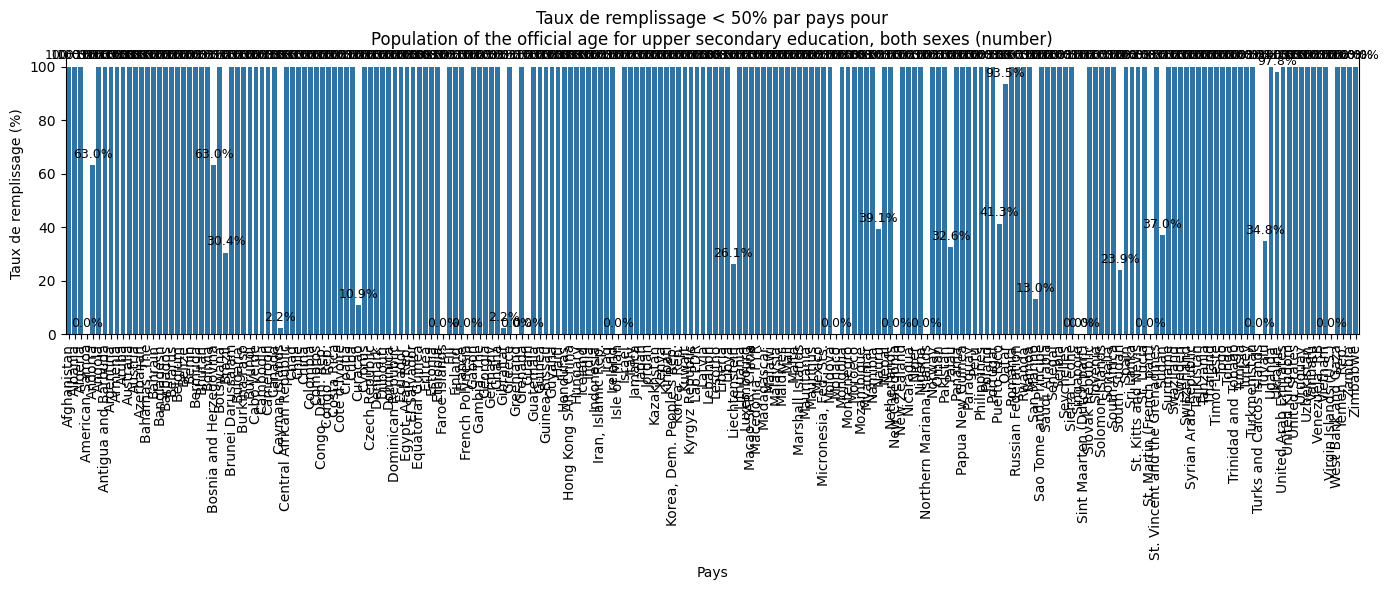

In [236]:
# 1. Filtrer uniquement les colonnes des années
df_years = df_topic_population[['Indicator Name', 'Country Name'] + years_passed]

# 2. Calcul du taux de remplissage par pays + indicateur
taux_filled_by_country_year = df_years.set_index(['Indicator Name', 'Country Name'])[years_passed] \
    .notna().mean(axis=1).reset_index()

# 3. Conversion en %
taux_filled_by_country_year.columns = ['Indicator Name', 'Country Name', 'Taux Remplissage']
taux_filled_by_country_year['Taux Remplissage'] = (taux_filled_by_country_year ['Taux Remplissage'] * 100).round(4)
indicator = "Population of the official age for upper secondary education, both sexes (number)"
df_plot = taux_filled_by_country_year[taux_filled_by_country_year['Indicator Name'] == indicator]

# 4. Affichage
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_plot, x='Country Name', y='Taux Remplissage')
plt.xticks(rotation=90)
plt.title(f"Taux de remplissage < 50% par pays pour\n{indicator}")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Pays")

    ###Ajouter les labels au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()


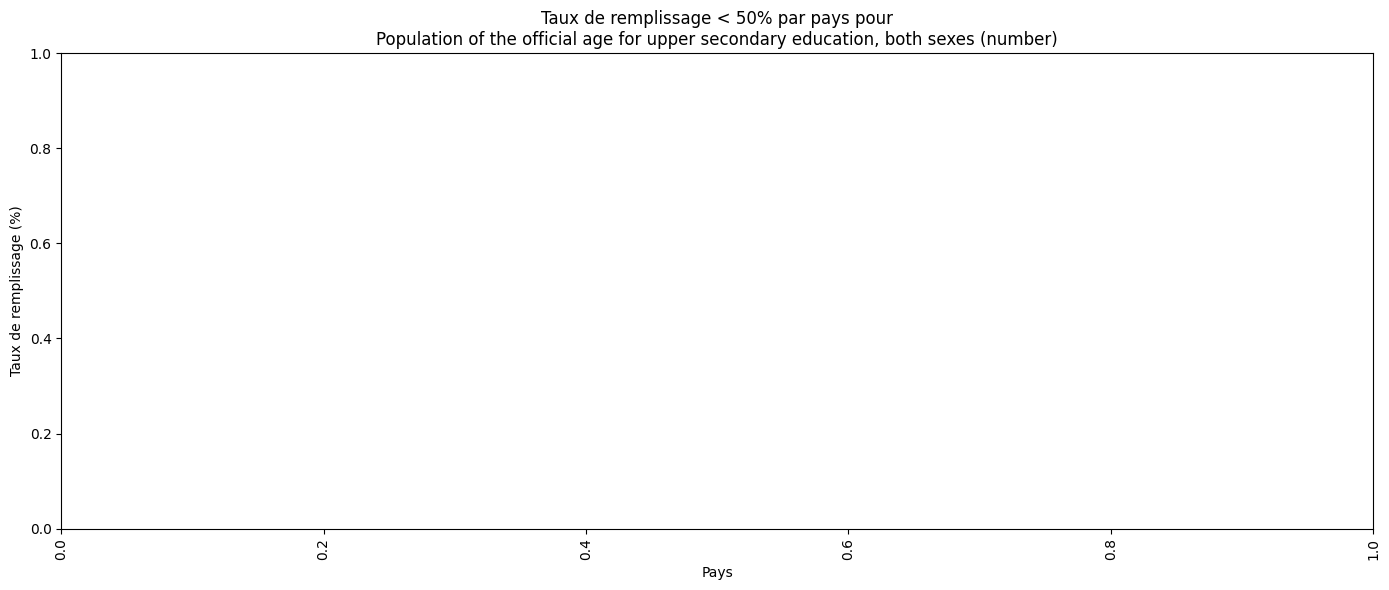

In [237]:
indicator = "Population of the official age for upper secondary education, both sexes (number)"
df_plot = taux_filled_by_country_year[taux_filled_by_country_year['Indicator Name'] == indicateur]
df_plot_filtered = df_plot[df_plot['Taux Remplissage'] < 50]

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_plot_filtered, x='Country Name', y='Taux Remplissage')
plt.xticks(rotation=90)
plt.title(f"Taux de remplissage < 50% par pays pour\n{indicator}")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Pays")

# Ajouter les labels au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()



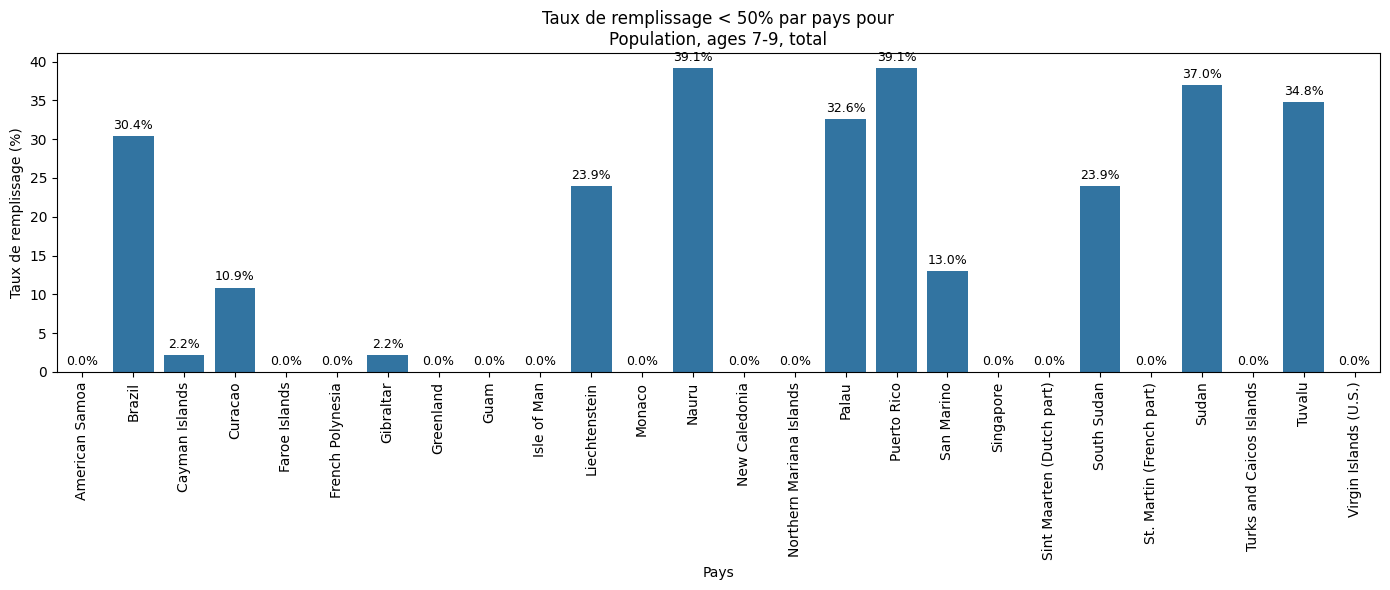

In [238]:
indicator = "Population of the official entrance age to secondary general education, both sexes (number)"
df_plot = taux_filled_by_country_year[taux_filled_by_country_year['Indicator Name'] == indicator]
df_plot_filtered = df_plot[df_plot['Taux Remplissage'] < 50]

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_plot_filtered, x='Country Name', y='Taux Remplissage')
plt.xticks(rotation=90)
plt.title(f"Taux de remplissage < 50% par pays pour\n{indicateur}")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Pays")

# Ajouter les labels au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()


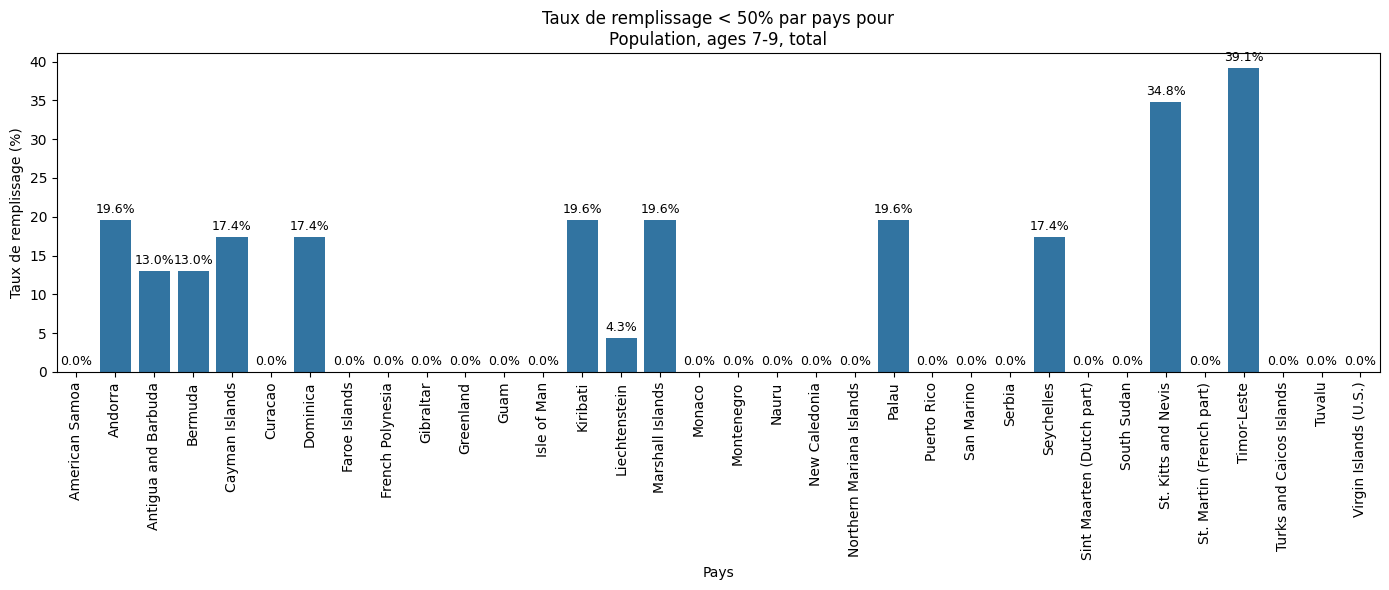

In [239]:
indicator = 'Population, ages 15-24, total'
df_plot = taux_filled_by_country_year[taux_filled_by_country_year['Indicator Name'] == indicator]
df_plot_filtered = df_plot[df_plot['Taux Remplissage'] < 50]

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_plot_filtered, x='Country Name', y='Taux Remplissage')
plt.xticks(rotation=90)
plt.title(f"Taux de remplissage < 50% par pays pour\n{indicateur}")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Pays")

# Ajouter les labels au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

In [117]:
# 1. Calcul du taux de remplissage par pays + indicateur
taux_remplissage = df_years.set_index(['Country Name', 'Indicator Name'])[years_passed] \
    .notna().mean(axis=1) * 100

# 2. Remise en DataFrame
df_taux = taux_remplissage.reset_index()
df_taux.columns = ['Country Name', 'Indicator Name', 'TauxRemplissage']

# 3. Agrégation pour éviter les doublons (au cas où il y a plusieurs lignes par pays+indicateur)
df_taux_grouped = df_taux.groupby(['Country Name', 'Indicator Name'], as_index=False).mean()

# 4. Pivot final
df_pivot = df_taux_grouped.pivot(index='Country Name', columns='Indicator Name', values='TauxRemplissage').round(2)

df_pivot.head(5)

Indicator Name,"Population of the official age for secondary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-24, total"
Country Name,,,,
Afghanistan,97.87,97.87,100.0,55.32
Albania,100.00,100.00,100.0,55.32
Algeria,97.87,97.87,100.0,55.32
American Samoa,0.00,0.00,0.0,0.00
Andorra,61.70,61.70,61.7,19.15


In [240]:
country_0_in_4 = df_pivot[(df_pivot == 0).all(axis=1)].index.tolist()
df_0_of_4 = df_pivot.loc[country_0_in_4]
df_0_of_4

Indicator Name,"Population of the official age for secondary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-24, total"
Country Name,,,,
American Samoa,0.0,0.0,0.0,0.0
Faroe Islands,0.0,0.0,0.0,0.0
French Polynesia,0.0,0.0,0.0,0.0
Greenland,0.0,0.0,0.0,0.0
Guam,0.0,0.0,0.0,0.0
Isle of Man,0.0,0.0,0.0,0.0
Monaco,0.0,0.0,0.0,0.0
New Caledonia,0.0,0.0,0.0,0.0
Northern Mariana Islands,0.0,0.0,0.0,0.0


In [241]:
# Compter le nombre de colonnes avec 0% par pays
nb_zeros = (df_pivot == 0).sum(axis=1)

# Garder ceux qui ont au moins 3 indicateurs à 0%
pays_0_of_3_ormore = nb_zeros[nb_zeros >= 3].index.tolist()
df_0_of_3= df_pivot.loc[pays_0_of_3_ormore]
df_0_of_3

Indicator Name,"Population of the official age for secondary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-24, total"
Country Name,,,,
American Samoa,0.0,0.0,0.0,0.00
Faroe Islands,0.0,0.0,0.0,0.00
French Polynesia,0.0,0.0,0.0,0.00
Greenland,0.0,0.0,0.0,0.00
Guam,0.0,0.0,0.0,0.00
Isle of Man,0.0,0.0,0.0,0.00
Monaco,0.0,0.0,0.0,0.00
New Caledonia,0.0,0.0,0.0,0.00
Northern Mariana Islands,0.0,0.0,0.0,0.00


In [246]:
# Extraire les index (noms des pays)
country_0_4 = set(df_0_of_4.index)
country_0_3_plus = set(df_0_of_3.index)

# Différence : pays avec 2 indicateurs à 0 mais pas 3
country_3_of_4 = country_0_3_plus - country_0_4
df_3_of_4 = df_0_of_3.loc[list(country_3_of_4)]
df_3_of_4

Indicator Name,"Population of the official age for secondary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-24, total"
Country Name,,,,
Singapore,0.0,0.0,0.0,55.32


Pays peu remplis :

In [247]:
# 1.Récupérer les noms des pays depuis l'index
country_0_of_4 = df_0_of_4.index.tolist()
country_0_of_3 = df_0_of_3.index.tolist()
country_3_of_4 = df_3_of_4.index.tolist()

# 2.Fusionner les 3 listes (et retirer les doublons si nécessaire)
country_nearly_empty = list(set(country_0_of_4 + country_0_of_3 + country_3_of_4))

# 3. Conversion en DF
country_nearly_empty = pd.DataFrame({'Country Name': country_nearly_empty})
country_nearly_empty

,Country Name
0,Northern Mariana Islands
1,Greenland
2,New Caledonia
3,American Samoa
4,Isle of Man
5,Sint Maarten (Dutch part)
6,French Polynesia
7,Turks and Caicos Islands
8,Virgin Islands (U.S.)
9,Guam


Pour voir si les valeurs des indicateurs sont récupérables, on va trier le DF par région puis par Income Group

In [248]:
df_topic_population_by_region = df_topic_population.sort_values(by='Region')

In [249]:
# 1. Extraire la liste des pays peu remplis
pays_peu_remplis = df_pays_peu_rempli['Country Name'].tolist()

# 2. Identifier les indicateurs que tu veux analyser
indicateurs_selectionnes = df_pays_post2000['Indicator Name'].unique()

# 3. Filtrer le DataFrame pour ne garder que ces indicateurs
df_indics = df_topic_population[df_topic_population['Indicator Name'].isin(indicateurs_selectionnes)].copy()

# 4. Calculer le taux de remplissage par ligne (donc par pays + indicateur)
df_indics['taux_remplissage'] = df_indics[years_passed].notna().mean(axis=1)

# 5. Calculer le taux moyen de remplissage par pays
taux_par_pays = (
    df_indics.groupby('Country Name')['taux_remplissage']
    .mean()
    .reset_index()
    .rename(columns={'taux_remplissage': 'taux_remplissage_moyen'})
)

# 6. Fusionner avec le DataFrame des pays de même région
pays_meme_region_sorted = pays_meme_region_sorted.merge(
    taux_par_pays,
    on='Country Name',
    how='left'
)

# 7. Trier si besoin (optionnel)
pays_meme_region_sorted = pays_meme_region_sorted.sort_values(
    by=['Region', 'Income Group', 'taux_remplissage_moyen'], ascending=[True, True, True]
)

# ✅ Affichage
pays_meme_region_sorted


NameError: name 'pays_meme_region_sorted' is not defined

In [ ]:
pays_east_asia = pays_meme_region_sorted[pays_meme_region_sorted['Region' == 'Latin America & Caribbean']]

### INDICATEURS INFRASTRUCTURE

In [251]:
topic_infra = df_filtered_topics[df_filtered_topics['Topic'] == 'Infrastructure: Communications']
indicators_infra_list = topic_infra['Indicator Name'].unique().tolist()
indicators_infra_list

['Internet users (per 100 people)', 'Personal computers (per 100 people)']

In [265]:
# 1. Filtrer pour ne garder que les indicateurs que l'on souhaite
df_subset = topic_infra[topic_infra['Indicator Name'].isin(indicators_infra_list)]

# 2. Calcul du taux de remplissage (% de pays non-NaN) par indicateur et par année
taux_filled_by_year = df_subset.groupby('Indicator Name')[years_passed].apply(
    lambda x: x.notna().mean() * 100
).round(2)

# 3. Résultat : un DataFrame avec les années en colonnes et un % par indicateur
taux_filled_by_year.head()



,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Internet users (per 100 people),3.26,0.0,0.0,0.0,0.0,3.26,3.26,3.26,3.26,3.26,...,92.09,95.35,94.88,94.42,94.42,95.35,94.42,93.95,93.95,93.95
Personal computers (per 100 people),0.47,0.0,0.0,0.0,0.0,0.47,0.47,0.47,0.47,0.47,...,46.51,22.33,12.56,1.40,0.00,0.00,0.00,0.00,0.00,0.00


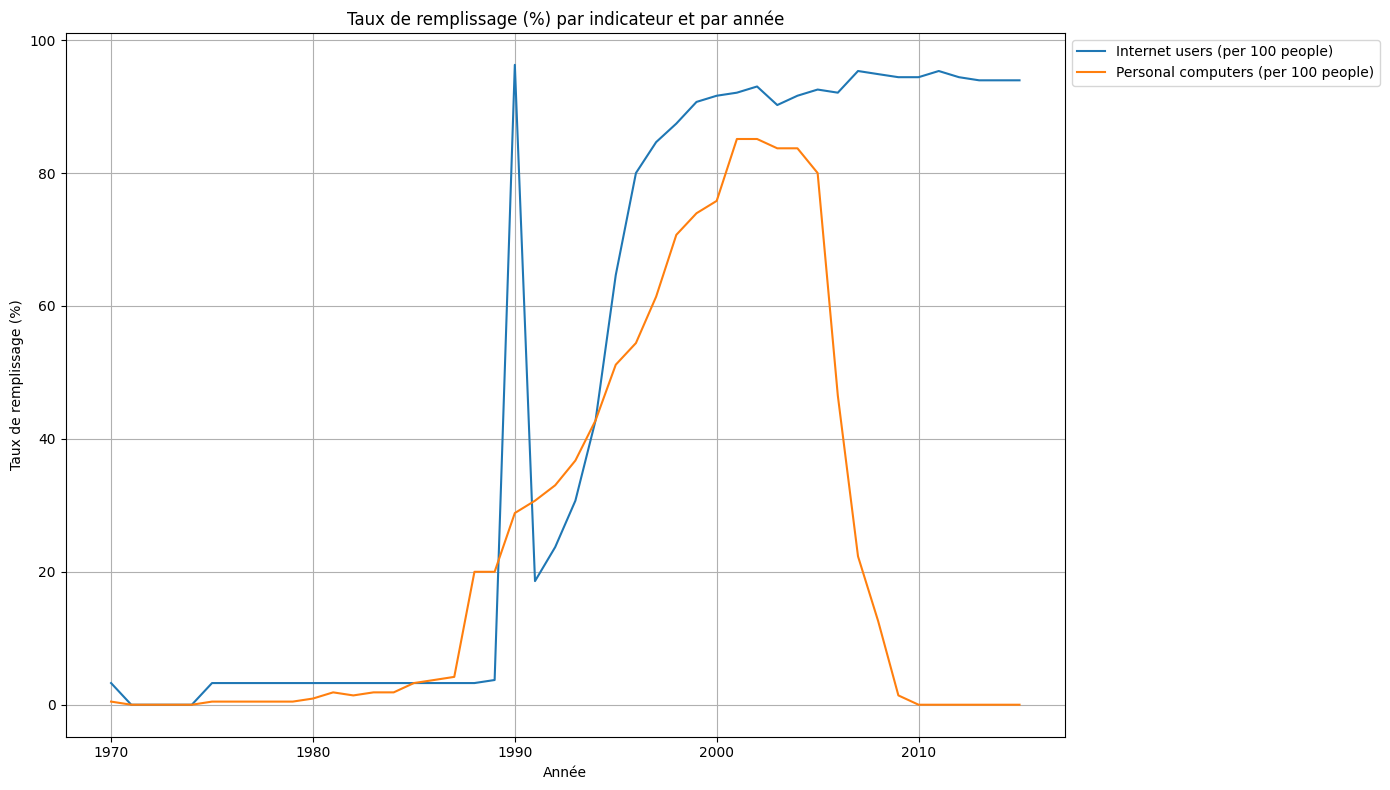

In [273]:
# 1. Taille du graphe
plt.figure(figsize=(14, 8))

# 2. Boucle sur chaque indicateur
for indicateur in taux_filled_by_year.index:
    plt.plot(
        taux_filled_by_year.columns.astype(int),   # années
        taux_filled_by_year.loc[indicateur],       # valeurs %
        label=indicateur
    )

# 3. Mise en forme
plt.title("Taux de remplissage (%) par indicateur et par année")
plt.xlabel("Année")
plt.ylabel("Taux de remplissage (%)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

On remarque que passé les années **~2005** il y a une nette baisse de l'usage de PC. On peut penser qu'un ffill pourrait permettre de récupérer ces données.

In [303]:
# 1. Filtrer les données pour l'indicateur
df_pc = topic_infra[topic_infra['Indicator Name'] == 'Personal computers (per 100 people)'].copy()

# 3. Calcul du taux de remplissage par pays (valeurs non-NaN / nb d'années)
df_pc['Taux de remplissage (%)'] = df_pc[years_post_2000].notna().mean(axis=1) * 100

# 4. Garder seulement les colonnes utiles pour visualisation
df_pc_taux = df_pc[['Country Name', 'Taux de remplissage (%)']].sort_values(by='Taux de remplissage (%)', ascending=False)

df_pc_taux 

,Country Name,Taux de remplissage (%)
471204,Mongolia,60.000000
192664,Djibouti,60.000000
53394,Bahrain,53.333333
46064,Azerbaijan,53.333333
713094,Tunisia,53.333333
...,...,...
658119,St. Martin (French part),0.000000
368584,"Korea, Dem. People’s Rep.",0.000000
698434,Timor-Leste,0.000000
16744,Andorra,0.000000


In [305]:
# 1. Créer un DF pour réaliser les graphiques d'évolution de l'indicateur
df_pc_long = df_pc.melt(
    id_vars=['Country Name', 'Region'],
    value_vars=years_post_2000,
    var_name='Year',
    value_name='Taux'
)
### La fonction melt() de pandas permet de transformer un DataFrame "large" en un DataFrame "long"
###c’est-à-dire de passer d’un format avec une colonne par année à un format où les années deviennent des lignes.

# 2.Convertir l’année en entier
df_pc_long['Year'] = df_pc_long['Year'].astype(int)


df_pc_long 

,Country Name,Region,Year,Taux
0,Afghanistan,South Asia,2001,NaN
1,Albania,Europe & Central Asia,2001,0.912941
2,Algeria,Middle East & North Africa,2001,0.684288
3,American Samoa,East Asia & Pacific,2001,NaN
4,Andorra,Europe & Central Asia,2001,NaN
...,...,...,...,...
3220,Virgin Islands (U.S.),Latin America & Caribbean,2015,NaN
3221,West Bank and Gaza,Middle East & North Africa,2015,NaN
3222,"Yemen, Rep.",Middle East & North Africa,2015,NaN
3223,Zambia,Sub-Saharan Africa,2015,NaN


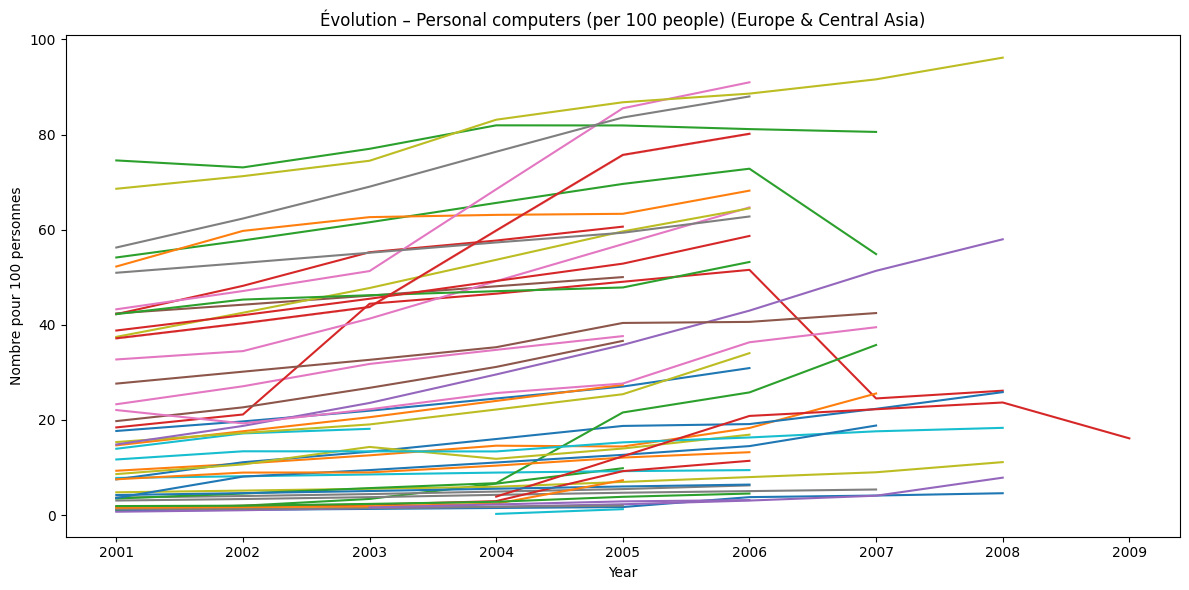

In [308]:
# 1. Choix de la région
region_target = "Europe & Central Asia"
df_region = df_pc_long[df_pc_long['Region'] == region_target]

# 2. Affichage
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_region,
    x='Year',
    y='Taux',
    hue='Country Name',
    palette='tab10'
)

  ## La légende étant trop imposante au vu du nombre de pays, on ne l'affiche pas
plt.legend().remove()

plt.title(f"Évolution – Personal computers (per 100 people) ({region_target})")
plt.ylabel("Nombre pour 100 personnes")
plt.tight_layout()
plt.show()

L'évolution de l'indicateur semble linéaire. On peut donc en déduire des valeurs possibles.

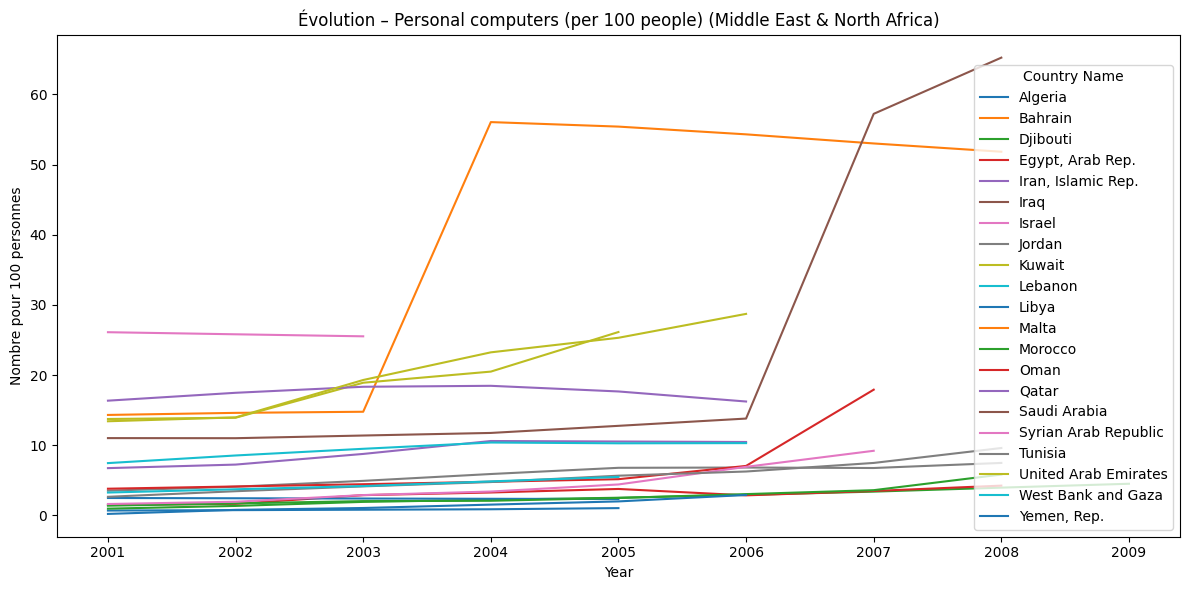

In [309]:
# 1. Choix de la région

region_target = "Middle East & North Africa"
df_region = df_pc_long[df_pc_long['Region'] == region_target]

# 2. Affichage
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_region,
    x='Year',
    y='Taux',
    hue='Country Name',
    palette='tab10'
)


plt.title(f"Évolution – Personal computers (per 100 people) ({region_target})")
plt.ylabel("Nombre pour 100 personnes")
plt.tight_layout()
plt.show()

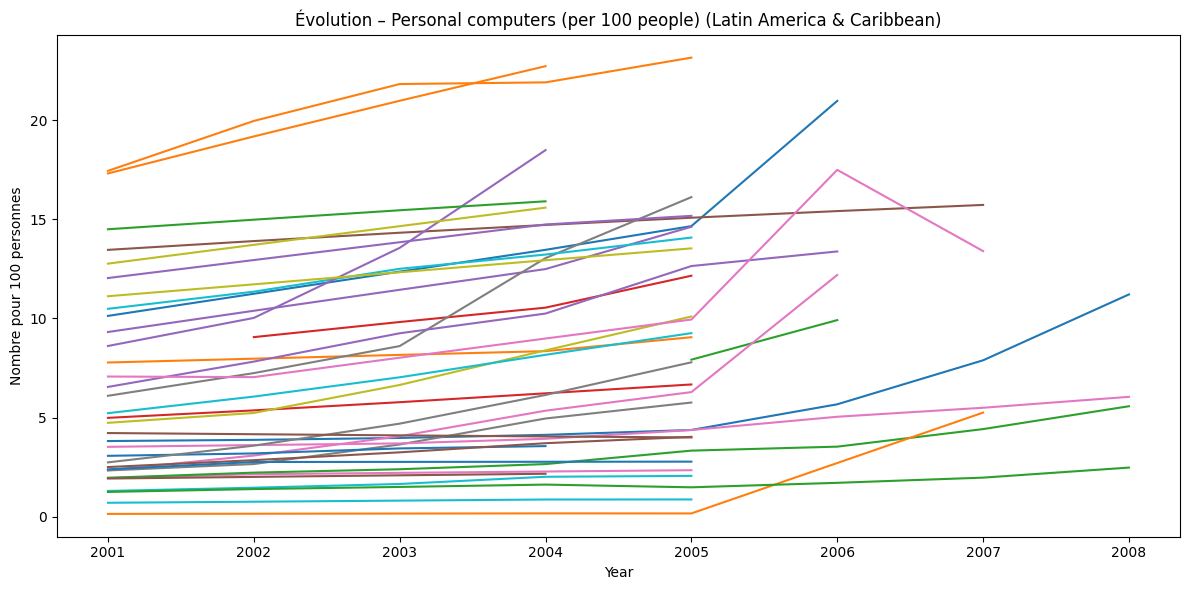

In [310]:
# 1. Choix de la région

region_target = "Latin America & Caribbean"
df_region = df_pc_long[df_pc_long['Region'] == region_target]

# 2. Affichage
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_region,
    x='Year',
    y='Taux',
    hue='Country Name',
    palette='tab10'
)


plt.legend().remove()

plt.title(f"Évolution – Personal computers (per 100 people) ({region_target})")
plt.ylabel("Nombre pour 100 personnes")
plt.tight_layout()
plt.show()

L'évolution de l'indicateur pour les pays où il manque des valeurs à partir de 2005 semble linéaire. Cependant, comme le taux maximal ne dépasse pas les 25%, on peut penser que cette région n'est pas la plus adaptée pour le projet de Mark.

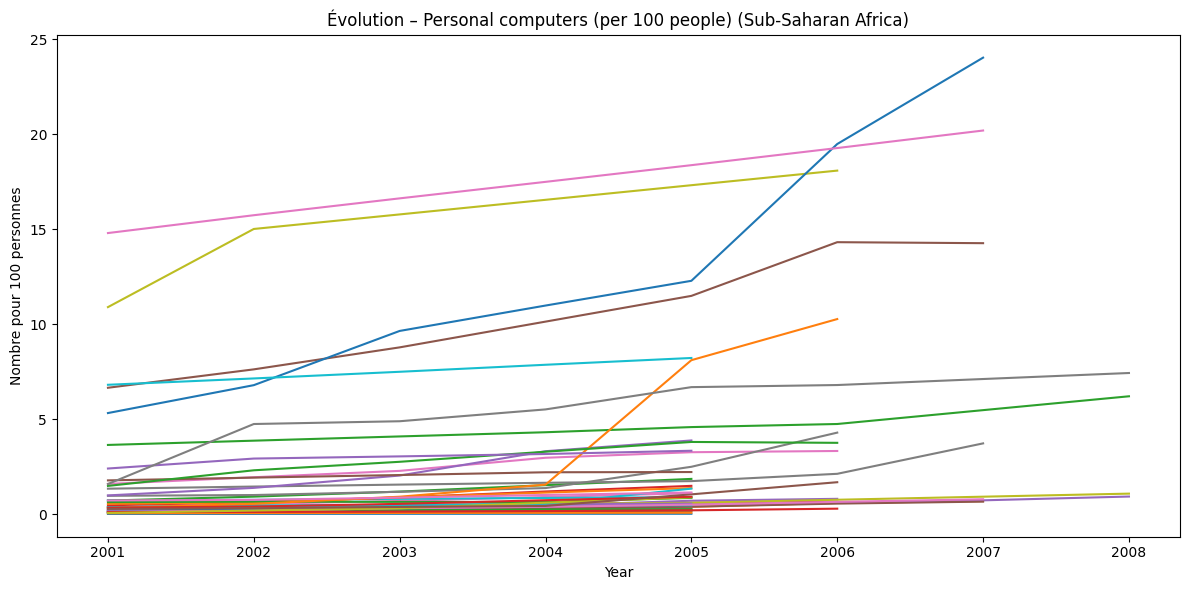

In [311]:
# 1. Choix de la région

region_target = "Sub-Saharan Africa"
df_region = df_pc_long[df_pc_long['Region'] == region_target]

# 2. Affichage
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_region,
    x='Year',
    y='Taux',
    hue='Country Name',
    palette='tab10'
)


plt.legend().remove()

plt.title(f"Évolution – Personal computers (per 100 people) ({region_target})")
plt.ylabel("Nombre pour 100 personnes")
plt.tight_layout()
plt.show()

Comme après 2005 il y a peu de valeur, & que le taux de nombre de personne ne dépasse pas les 25% ( >5% pour la majorité des pays), on peut supposer que ces pays ne sont pas intéressant pour le projet de Mark

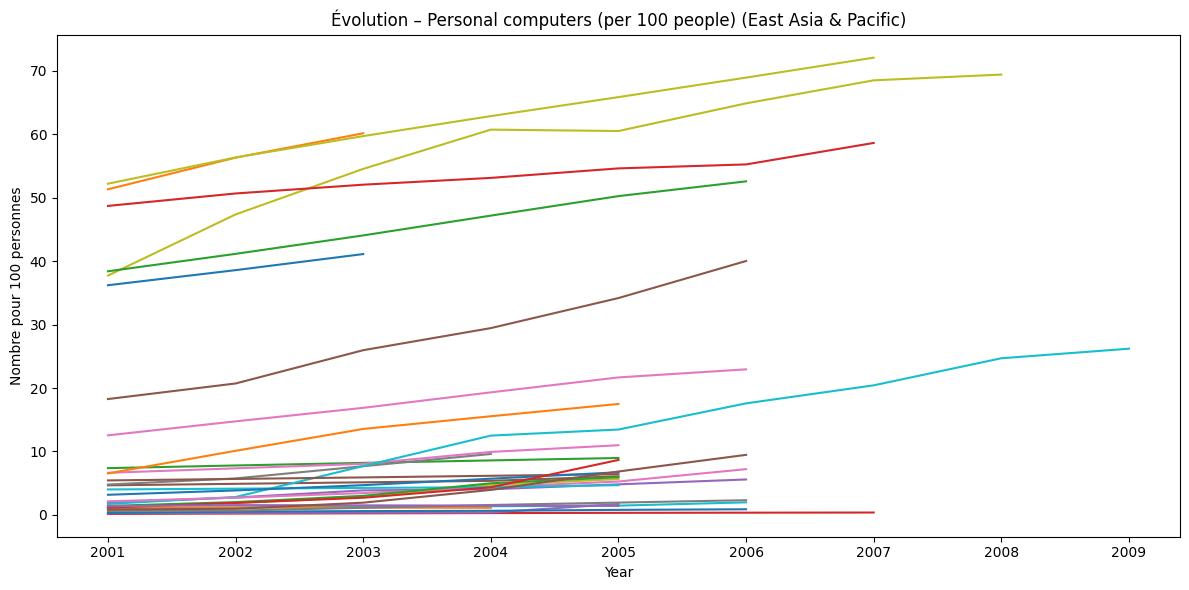

In [316]:
# 1. Choix de la région

region_target = "East Asia & Pacific"
df_region = df_pc_long[df_pc_long['Region'] == region_target]

# 2. Affichage
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_region,
    x='Year',
    y='Taux',
    hue='Country Name',
    palette='tab10'
)

plt.legend().remove()

plt.title(f"Évolution – Personal computers (per 100 people) ({region_target})")
plt.ylabel("Nombre pour 100 personnes")
plt.tight_layout()
plt.show()

L'évolution de l'indicateur semble linéaire. On peut donc en déduire des valeurs possibles.

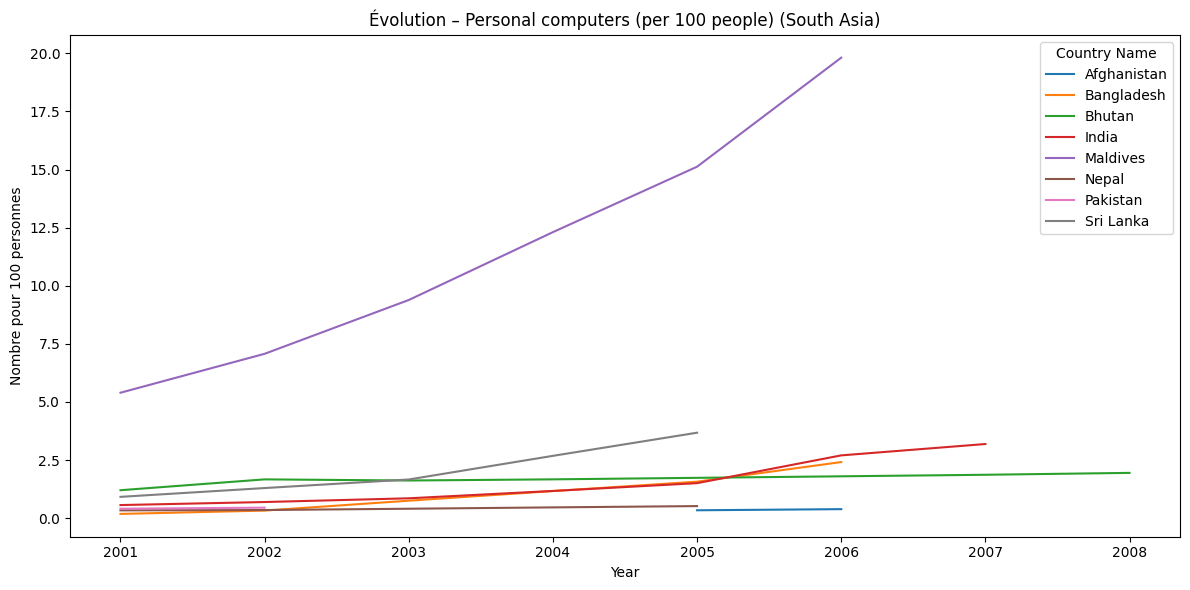

In [313]:
# 1. Choix de la région

region_target = "South Asia"
df_region = df_pc_long[df_pc_long['Region'] == region_target]

# 2. Affichage
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_region,
    x='Year',
    y='Taux',
    hue='Country Name',
    palette='tab10'
)


plt.title(f"Évolution – Personal computers (per 100 people) ({region_target})")
plt.ylabel("Nombre pour 100 personnes")
plt.tight_layout()
plt.show()

Comme après 2005 il y a peu de valeur, & que le taux de nombre de personne ne dépasse pas les 20% ( < 2.5 % pour la majorité des pays), on peut supposer que ces pays ne sont pas intéressant pour le projet de Mark

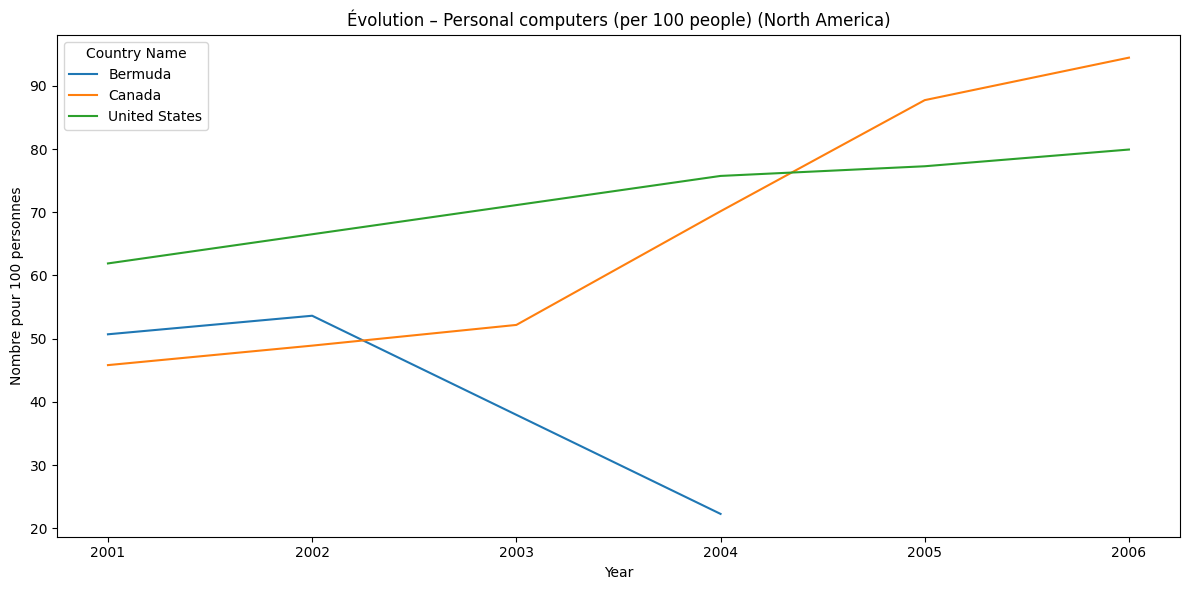

In [314]:
# 1. Choix de la région

region_target = "North America"
df_region = df_pc_long[df_pc_long['Region'] == region_target]

# 2. Affichage
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_region,
    x='Year',
    y='Taux',
    hue='Country Name',
    palette='tab10'
)


plt.title(f"Évolution – Personal computers (per 100 people) ({region_target})")
plt.ylabel("Nombre pour 100 personnes")
plt.tight_layout()
plt.show()

In [315]:
internet_row = taux_filled_by_year.loc["Internet users (per 100 people)"]

# Garder les années avec un taux > 80%
years_above_80 = internet_row[internet_row > 80]
years_above_80

1990    96.28
1997    84.65
1998    87.44
1999    90.70
2000    91.63
2001    92.09
2002    93.02
2003    90.23
2004    91.63
2005    92.56
2006    92.09
2007    95.35
2008    94.88
2009    94.42
2010    94.42
2011    95.35
2012    94.42
2013    93.95
2014    93.95
2015    93.95
Name: Internet users (per 100 people), dtype: float64